# The power-law lens

The power-law lens has a convergence profile of the kind
$$
\kappa(x)=\frac{3-n}{2}x^{1-n}
$$

The corresponding mass profile is 
$$
m(x)=x^{3-n}
$$
which implies that the deflection angle is 
$$
\alpha(x)=x^{2-n}
$$
and that the shear profile is
$$
\gamma(x)=\frac{m(x)}{x^2}-\kappa(x)=\frac{n-1}{2}x^{1-n} \;.
$$

Here are some plots of some of the relevant quantities.

In [1]:
from scipy.optimize import fsolve, newton

class pl_lens(object):
    def __init__(self,co,n=1.0,zl=0.5,zs=2.0,thetae=1.0):
        self.n=n
        self.thetae=thetae
        self.co=co
        
    def kappa(self,x):
        return((3.0-self.n)/2.0*np.abs(x)**(1.0-self.n))
    
    def gamma(self,x):
        return(np.abs((self.n-1.0)/2.0*np.abs(x)**(1.0-self.n)))
    
    def mass(self,x):
        return(np.abs(x)**(3.0-self.n))
    
    def alpha(self,x):
        return(np.sign(x)*np.abs(x)**(2.0-self.n))
    
    def lambdar(self,x):
        return 1-(2.0-self.n)*np.abs(x)**(1.0-self.n)

    def lambdat(self,x):
        return 1-np.abs(x)**(1.0-self.n)
    
    def radcl(self):
        return((2.0-self.n)**(1./(self.n-1)))

    def radcau(self):
        return -(self.radcl()-self.alpha(self.radcl()))

    def ext_source(self,yc1,yc2,rs):
        phi=np.linspace(0,2.*np.pi,1000)
        y1=yc1+rs*np.cos(phi)
        y2=yc2+rs*np.sin(phi)
        return(y1,y2,phi)
    
    def ext_images(self,yc1,yc2,rs):
        y1,y2,phi2=self.ext_source(yc1,yc2,rs)
        ys=np.sqrt(y1*y1+y2*y2)
        xi1=[]
        xi2=[]
        xi3=[]
        phi1=[]
        phi2=[]
        phi3=[]
        for j in range(len(ys)):
            def func(xx):
                return (xx-ys[j]-pl.alpha(xx))
            x0_ = fsolve(func,ys[j]+1.0)
            x1_ = fsolve(func,ys[j]-1.0)
            x3_ = fsolve(func,0.0)
            phi=np.arctan2(y2[j],y1[j])
            if (np.abs(func(x0_))<1e-8):
                xi1.append(x0_)
                phi1.append(phi)
            if (np.abs(func(x1_))<1e-8 and (np.sign(x1_) != np.sign(ys[j]))):
                xi2.append(x1_)
                phi2.append(phi)
            if (np.abs(func(x3_))<1e-8 and (np.sign(x1_) != np.sign(ys[j]))):
                xi3.append(x3_)
                phi3.append(phi)
        xi1=np.array(xi1).reshape(len(xi1))
        xi2=np.array(xi2).reshape(len(xi2))
        xi3=np.array(xi3).reshape(len(xi3))
        return(xi1,phi1,xi2,phi2,xi3,phi3)
    
    def pot_power(self,x):
        return 1.0/(3.0-self.n)*np.abs(x)**(3.0-self.n)
    
    #utils
    def SigmaCrit(self):
        from astropy.constants import c, G
        dl=self.co.angular_diameter_distance(self.zl)
        ds=self.co.angular_diameter_distance(self.zs)
        dls=self.co.angular_diameter_distance_z1z2(self.zl,self.zs)
        c2_G_Msun_Mpc = (c**2/G).to(u.Msun/u.Mpc)
        sigma_cr = c2_G_Msun_Mpc/(4*np.pi)*(ds/dl/dls)
        return(sigma_cr)

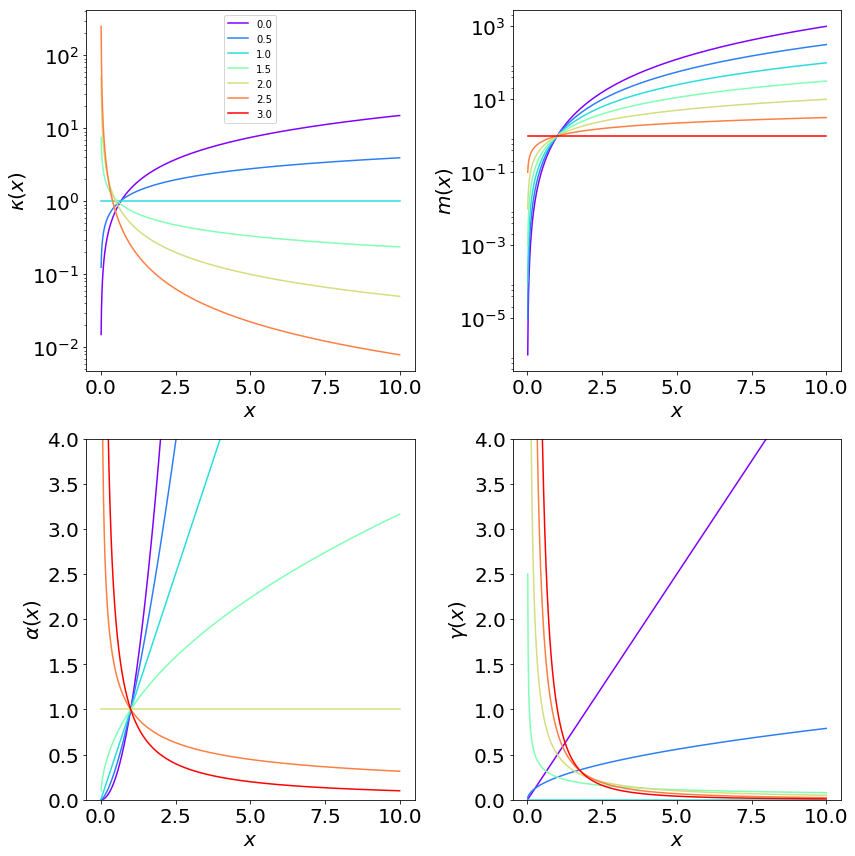

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm 
from astropy.cosmology import FlatLambdaCDM
fig,ax=plt.subplots(2,2,figsize=(12,12))

x=np.logspace(-2,1.0,1000)
n=np.linspace(0,3,7)

color=iter(cm.rainbow(np.linspace(0,1,n.size)))
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_ylim([0,4])
ax[1,1].set_ylim([0,4])

"""
When dealing with lenses at cosmological distances,
we need to specify a cosmological model
"""

co = FlatLambdaCDM(H0=70, Om0=0.3)

for i in range(n.size):
    pl=pl_lens(co,n=n[i],zl=0.5,zs=2.0,thetae=1.0)
    c=next(color)
    ka=pl.kappa(x)
    m=pl.mass(x)
    a=pl.alpha(x)
    g=pl.gamma(x)
    ax[0,0].plot(x,ka,color=c,label=str(n[i]))
    ax[0,1].plot(x,m,color=c,label=str(n[i]))
    ax[1,0].plot(x,a,color=c,label=str(n[i]))
    ax[1,1].plot(x,g,color=c,label=str(n[i]))
    
for i in range(2):
    for j in range(2):
        ax[i,j].xaxis.set_tick_params(labelsize=20)
        ax[i,j].yaxis.set_tick_params(labelsize=20)
    
ax[0,0].legend(loc='best')
ax[0,0].set_xlabel('$x$',fontsize=20)
ax[0,0].set_ylabel('$\kappa(x)$',fontsize=20)
ax[0,1].set_xlabel('$x$',fontsize=20)
ax[0,1].set_ylabel('$m(x)$',fontsize=20)
ax[1,0].set_xlabel('$x$',fontsize=20)
ax[1,0].set_ylabel(r'$\alpha(x)$',fontsize=20)
ax[1,1].set_xlabel('$x$',fontsize=20)
ax[1,1].set_ylabel(r'$\gamma(x)$',fontsize=20)

plt.tight_layout()

We can note that:
* for $n<1$, the power-law lens has a monotonically increasing convergence profile. Thus, this kind of lens models are not suited to describe the mass distribution of gravitationally bound systems like galaxies and galaxy clusters;
* for $n=1$, the convergence profile is flat (perfectly convergent lens);
* for $1 < n <2$, the convergence profile is a decreasing function of $x$ and $\alpha(x)$ is zero at origin; 
* for $n=2$, $\alpha(x)=const$, meaning that $\Psi(x)\propto x$ (the time delay surface becomes non-continuously deformable at $x=0$;
* for $2< n < 3$, $\alpha(x)$ diverges for $x\rightarrow 0$. The lensing potential is singular at the origin;
* the case $n=3$ corresponds to the point-mass lens: $m=1=const$, $\alpha(x)=1/x$;
* finally, $n>3$ is un-physical, since it produces mass profiles which decrease with $x$.

## Magnification and critical lines

The magnification is
$$
\det A=(1-\kappa-\gamma)(1-\kappa+\gamma)
$$

In particular, the inverse tangential and the radial magnifications are 
$$
\lambda_t=1-x^{1-n}
$$
and
$$
\lambda_r=1-(2-n)x^{1-n}
$$

The critical lines are given by
$$
x_t=1
$$
and 
$$
x_r=\left(\frac{1}{2-n}\right)^\frac{1}{1-n}=(2-n)^\frac{1}{n-1}
$$

This shows that the radial critical line exists for $1<n<2$.

/Users/massimo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in double_scalars


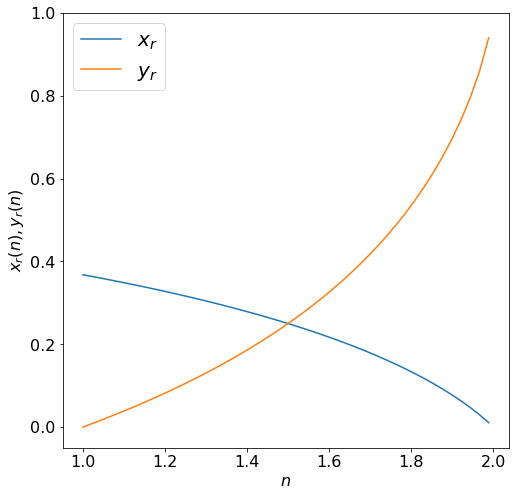

In [3]:
n=np.linspace(1.0001,3,90)

xr=[]
yr=[]

for n_ in n:
    pl=pl_lens(co,n=n_)
    xr.append(pl.radcl())
    yr.append(pl.radcau())
    
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(n,xr,label=r'$x_r$')
ax.plot(n,yr,label=r'$y_r$')

ax.set_xlabel('$n$',fontsize=16)
ax.set_ylabel('$x_r(n),y_r(n)$',fontsize=16)
#ax.plot([1.0,1.0],[-1,1],':',color='black')
ax.set_ylim([-0.05,1.0])
ax.legend(loc='best',fontsize=20)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

# Multiple images

## Lenses with $n<2$

Let's discuss the occurrence of multiple images. To this goal, it is useful to build the so called "image diagram", comparing the two functions appearing in the lens equation, namely $\alpha(x)$ and $f(x)=x-y$.

The following figure shows the diagram for a power-law lens with $n=1.7$. The function $f(x)$ is shown for different values of $y$.

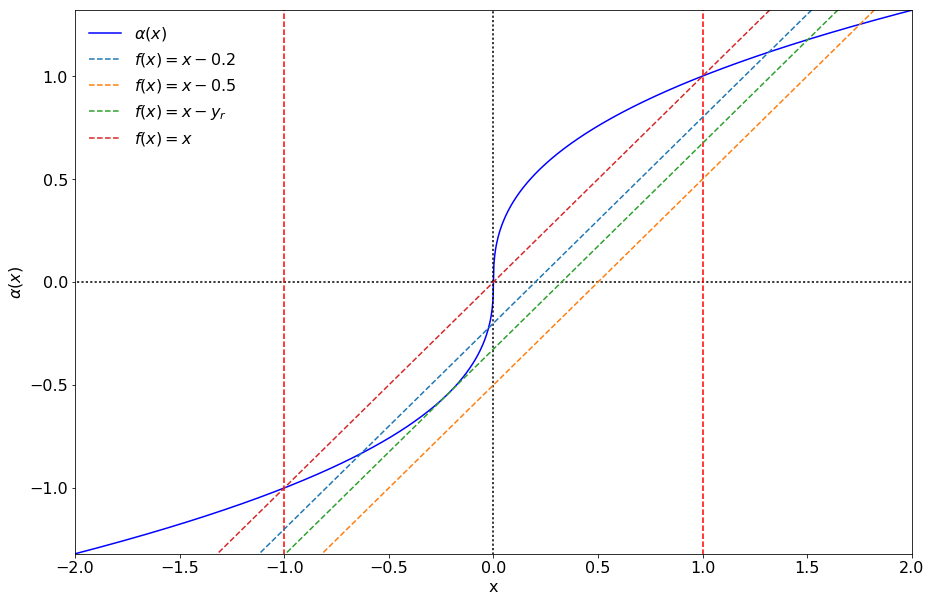

In [4]:
xmin=-2.0
xmax=-xmin
x=np.linspace(xmin,xmax,1000)
pl=pl_lens(co,n=1.6)
a=pl.alpha(x)

fig,ax=plt.subplots(1,1,figsize=(15,10))
ax.plot(x,a,'-',color='blue',label=r'$\alpha(x)$')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'$\alpha(x)$',fontsize=16)

xx=[xmin-0.2,xmax+0.2]
yy=[0,0]
ax.plot(xx,yy,':',color='black')
ax.plot(yy,xx,':',color='black')
ax.set_ylim(np.min(a),np.max(a))
ax.set_xlim(np.min(x),np.max(x))

ax.plot([-1,-1],xx,'--',color='red')
ax.set_ylim(np.min(a),np.max(a))
ax.set_xlim(np.min(x),np.max(x))

ax.plot([1,1],xx,'--',color='red')
ax.set_ylim(np.min(a),np.max(a))
ax.set_xlim(np.min(x),np.max(x))

ys=0.2
f=x-ys
ax.plot(x,f,'--',label=r'$f(x)=x-$'+str(ys))

ys=0.5
f=x-ys
ax.plot(x,f,'--',label=r'$f(x)=x-$'+str(ys))


ys=pl.radcau()
f=x-ys
ax.plot(x,f,'--',label=r'$f(x)=x-y_r$')

ys=0.0
f=x-ys
ax.plot(x,f,'--',label=r'$f(x)=x$')

ax.legend(fontsize=16,frameon=False)

The diagram clearly shows that the appearence of multiple images is tightly connected to the presence of a radial critical line. Indeed, there is maximum distance $y_r$ from the lens center projected onto the source plane, behind which the source won't produce multiple images. This maximum distance can be found by imposing a tangency condition between $\alpha(x)$ and $f(x)$. Since the slope of $f(x)$ is one. This condition writes:

$$
\frac{d\alpha}{dx}=1
$$

which indeed defines the radial critical line. Thus, $y_r$ is the radius of the radial caustic.

The following are some image diagrams for lenses with $n=1.1,1.0,1.5$

/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/massimo/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


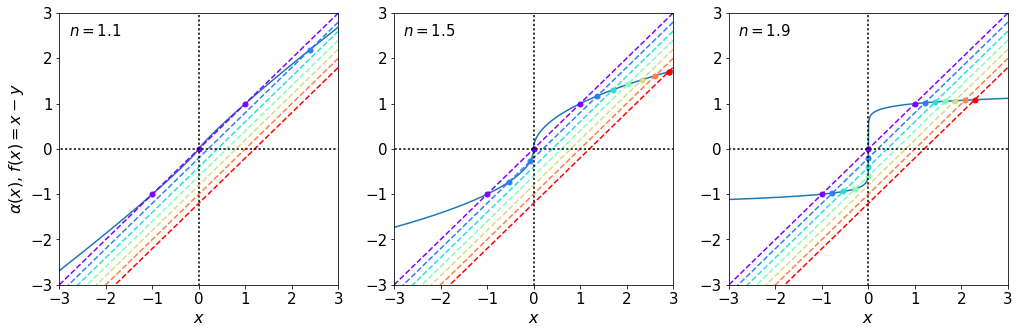

In [5]:
import math
from scipy.optimize import *

n=[1.1,1.5,1.9]

fig,ax=plt.subplots(1,3,figsize=(17,5))

x=np.linspace(-3,3,1000)

def f(x,y):
    return(x-y)
    
ys=np.linspace(0,1.2,7)


    
for i in range(len(n)):
    pl=pl_lens(co,n=n[i])
    a=pl.alpha(x)
    ax[i].plot(x,a,'-')
    color=iter(cm.rainbow(np.linspace(0,1,len(ys))))
    for j in range(len(ys)):
        c=next(color)
        fu=f(x,ys[j])
        ax[i].plot(x,fu,'--',c=c)
        def func(xx):
            return f(xx,ys[j])-pl.alpha(xx)
        x0 = fsolve(func,1.0)
        x1 = fsolve(func,-1.0)
        x3 = fsolve(func,0.0)
        if (np.abs(func(x0))<1e-8):
            ax[i].plot(x0,pl.alpha(x0),'o',markersize=5,c=c)
        if (np.abs(func(x1))<1e-8):
            ax[i].plot(x1,pl.alpha(x1),'o',markersize=5,c=c)
        if (np.abs(func(x3))<1e-8):
            ax[i].plot(x3,pl.alpha(x3),'o',markersize=5,c=c)
        
        
    ax[i].set_xlim([-3,3])
    ax[i].set_ylim([-3,3])
    ax[i].text(-2.8,2.5,'$n=$'+str(n[i]),fontsize=15)

    
    xa=[0.0,0.0]
    ya=[-10,10]
    ax[i].plot(xa,ya,':',color='black')
    
    xa=[-10.0,10.0]
    ya=[0,0]
    ax[i].plot(xa,ya,':',color='black')
    
    ax[0].set_ylabel(r'$\alpha(x)$, $f(x)=x-y$',fontsize=16)
    ax[0].legend()
    for i in range(3):
        ax[i].xaxis.set_tick_params(labelsize=15)
        ax[i].yaxis.set_tick_params(labelsize=15)
        ax[i].set_xlabel('$x$',fontsize=16)

Some noticeable properties:
* these lenses produce three or one image
* three images are formed if the source lays inside the radial critical line, i.e. for $y<y_r$, where $y_r$ corresponds to $x_r: dy/dx=0$

### Extended sources

The code below solves the lens equation for all points on the boundary of a circular extended source, allowing to visualize the images and their distortions.

/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


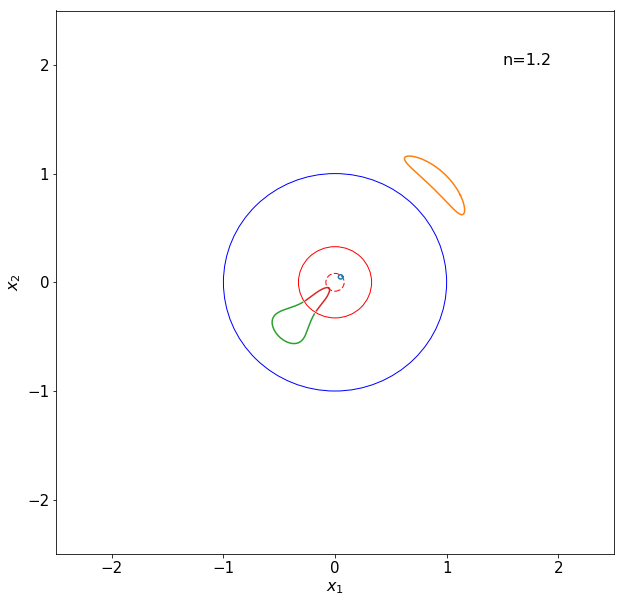

In [6]:
nl=1.2
pl=pl_lens(co,n=nl)
yc1=0.05
yc2=0.05
rs=0.02
ys1,ys2,phi=pl.ext_source(yc1,yc2,rs)
xi1,phi1,xi2,phi2,xi3,phi3=pl.ext_images(yc1,yc2,rs)


fig,ax=plt.subplots(1,1,figsize=(10,10))

er=plt.Circle((0,0),1.0,color='blue',fill=False)
rad_cl=plt.Circle((0,0),pl.radcl(),color='red',fill=False)
rad_cau=plt.Circle((0,0),pl.radcau(),ls='--',color='red',fill=False)
ax.add_artist(er)
ax.add_artist(rad_cl)
ax.add_artist(rad_cau)

ax.plot(ys1,ys2,'-')
x1=np.array(xi1)*np.cos(phi1)
x2=np.array(xi1)*np.sin(phi1)
ax.plot(x1,x2,'-')
if (xi2.size>0):
    x1=np.array(xi2)*np.cos(phi2)
    x2=np.array(xi2)*np.sin(phi2)
    ax.plot(x1,x2,'-')
if (xi3.size>0):
    x1=np.array(xi3)*np.cos(phi3)
    x2=np.array(xi3)*np.sin(phi3)
    ax.plot(x1,x2,'-')

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x_1$',fontsize=16)
ax.set_ylabel(r'$x_2$',fontsize=16)
ax.text(1.5,2,'n='+str(nl),fontsize=16)

/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


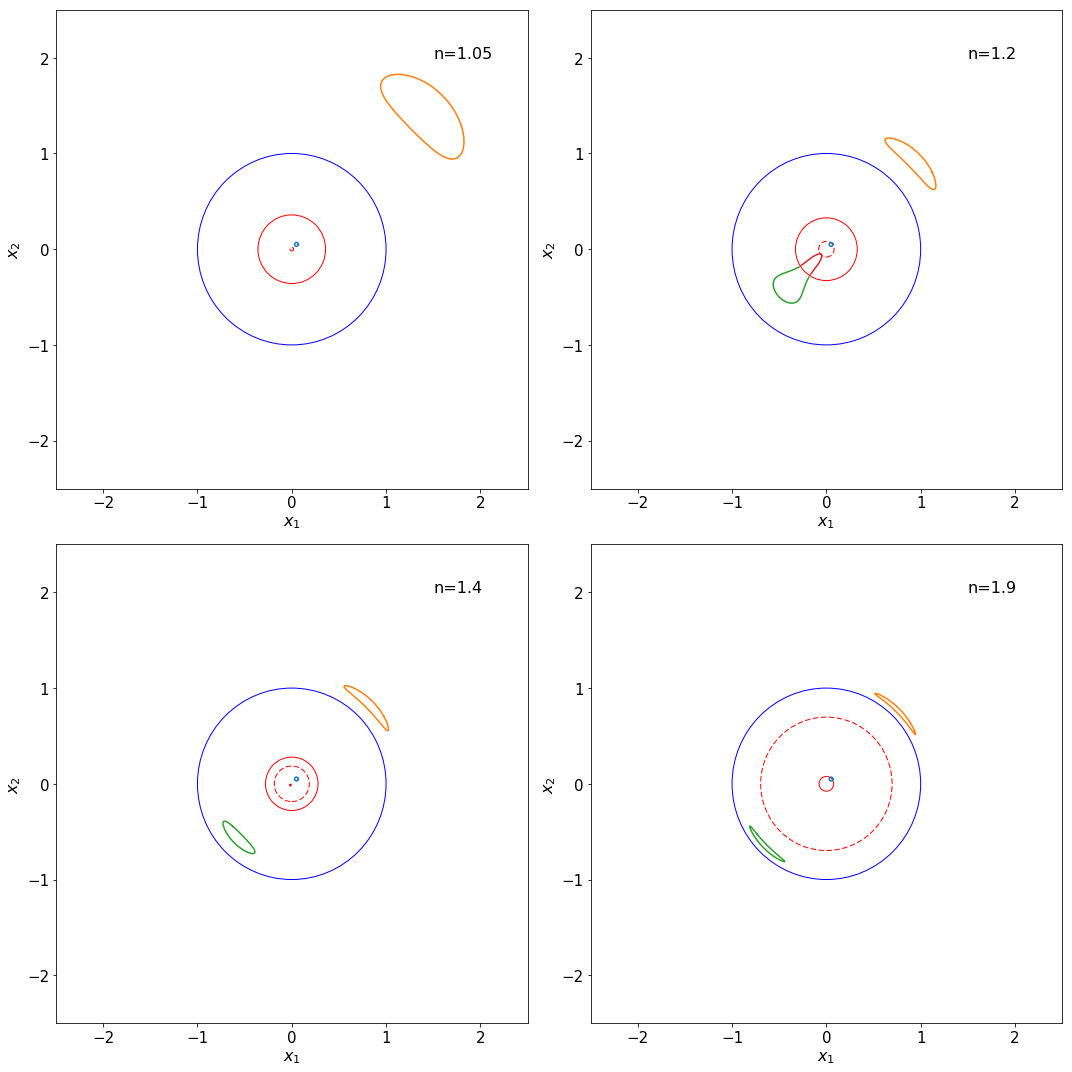

In [7]:
nl=[1.05,1.2,1.4,1.9]
px=[0,0,1,1]
py=[0,1,0,1]
yc1=0.03535
yc2=0.03535
rs=0.02
fig,ax=plt.subplots(2,2,figsize=(15,15))
for i in range(len(nl)):
    pl=pl_lens(co,n=nl[i])
    yc1=0.05
    yc2=0.05
    ys1,ys2,phi=pl.ext_source(yc1,yc2,rs)
    xi1,phi1,xi2,phi2,xi3,phi3=pl.ext_images(yc1,yc2,rs)

    er=plt.Circle((0,0),1.0,color='blue',fill=False)
    rad_cl=plt.Circle((0,0),pl.radcl(),color='red',fill=False)
    rad_cau=plt.Circle((0,0),pl.radcau(),ls='--',color='red',fill=False)
    ax[px[i],py[i]].add_artist(er)
    ax[px[i],py[i]].add_artist(rad_cl)
    ax[px[i],py[i]].add_artist(rad_cau)

    ax[px[i],py[i]].plot(ys1,ys2,'-')
    x1=np.array(xi1)*np.cos(phi1)
    x2=np.array(xi1)*np.sin(phi1)
    ax[px[i],py[i]].plot(x1,x2,'-')
    if (xi2.size>0):
        x1=np.array(xi2)*np.cos(phi2)
        x2=np.array(xi2)*np.sin(phi2)
        ax[px[i],py[i]].plot(x1,x2,'-')
    if (xi3.size>0):
        x1=np.array(xi3)*np.cos(phi3)
        x2=np.array(xi3)*np.sin(phi3)
        ax[px[i],py[i]].plot(x1,x2,'-')
    ax[px[i],py[i]].set_xlim([-2.5,2.5])
    ax[px[i],py[i]].set_ylim([-2.5,2.5])

    ax[px[i],py[i]].xaxis.set_tick_params(labelsize=15)
    ax[px[i],py[i]].yaxis.set_tick_params(labelsize=15)
    ax[px[i],py[i]].set_xlabel(r'$x_1$',fontsize=16)
    ax[px[i],py[i]].set_ylabel(r'$x_2$',fontsize=16)
    ax[px[i],py[i]].text(1.5,2,'n='+str(nl[i]),fontsize=16)
    
plt.tight_layout()

# Lenses with $n>2$

These lenses always produce multiple images because of the singuarity of their lensing potential.

The following are some examples of image diagrams for $n=2.0,2.1,3.0$.

/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/massimo/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/massimo/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/massimo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in power
/Users/massimo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in multiply
/Users/massimo/anaconda/lib/py

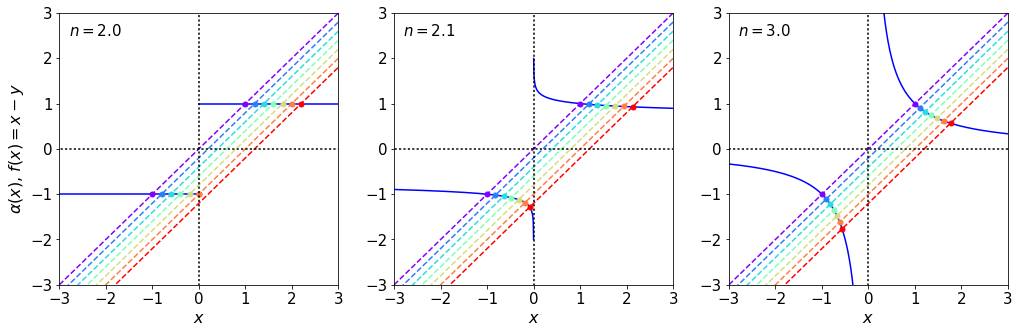

In [8]:
n=[2.0,2.1,3.0]

fig,ax=plt.subplots(1,3,figsize=(17,5))

x0=np.linspace(-3,-1.e-3,500)
x1=np.linspace(1.e-3,3,500)
    
ys=np.linspace(0,1.2,7)
    
for i in range(len(n)):
    pl=pl_lens(co,n=n[i])
    a0=pl.alpha(x0)
    a1=pl.alpha(x1)
    ax[i].plot(x0,a0,'-',color='blue')
    ax[i].plot(x1,a1,'-',color='blue')
    color=iter(cm.rainbow(np.linspace(0,1,len(ys))))
    for j in range(len(ys)):
        c=next(color)
        fu=f(x,ys[j])
        ax[i].plot(x,fu,'--',c=c)
        def func(xx):
            return f(xx,ys[j])-pl.alpha(xx)
        x0_ = fsolve(func,1.0)
        x1_ = fsolve(func,-1.0)
        x3_ = fsolve(func,0.0)
        if (np.abs(func(x0_))<1e-8):
            ax[i].plot(x0_,pl.alpha(x0_),'o',markersize=5,c=c)
        if (np.abs(func(x1_))<1e-8):
            ax[i].plot(x1_,pl.alpha(x1_),'o',markersize=5,c=c)
        if (np.abs(func(x3_))<1e-8 and j>0):
            ax[i].plot(x3_,pl.alpha(x3_),'o',markersize=5,c=c)
            
    ax[i].set_xlim([-3,3])
    ax[i].set_ylim([-3,3])
    ax[i].text(-2.8,2.5,'$n=$'+str(n[i]),fontsize=15)

    xa=[0.0,0.0]
    ya=[-10,10]
    ax[i].plot(xa,ya,':',color='black')
    
    xa=[-10.0,10.0]
    ya=[0,0]
    ax[i].plot(xa,ya,':',color='black')
    
    ax[0].set_ylabel(r'$\alpha(x)$, $f(x)=x-y$',fontsize=16)
    ax[0].legend()
    for i in range(3):
        ax[i].xaxis.set_tick_params(labelsize=15)
        ax[i].yaxis.set_tick_params(labelsize=15)
        ax[i].set_xlabel('$x$',fontsize=16)

Notice  that
* none of these lenses ever has a central image
* while for a lens with $n=2$ produces multiple images only for $|y|<y_{cut}=1$, all lenses with $n>2$ always have 2 images
* the $x_{-}$ image always moves towards the center of the lens as $y\rightarrow \infty$

# Elliptical lenses: the SIE

The SIE can be derived from the SIS (power-law lens with n=2) by making the substitution:

$$
\xi \Rightarrow \sqrt{\xi_1^2+f^2\xi_2^2}
$$

so that

$$
\Sigma(\xi)= \frac{\sigma_v^2}{2G}\frac{\sqrt{f}}{\sqrt{\xi_1^2+f^2\xi_2^2}}
$$

With this substitution, $\Sigma(\xi)$ will be constant on ellipses with minor axis $\xi$ and major axis $\xi/f$, oriented such that the major axis is along the $\xi_2$ axis. In the above formulas, $f=b/a$ is the axis ratio of the ellipses.

By choosing $\xi_0=\xi_{0,SIS}$ as reference scale, and using polar coordinates, we obtain

$$
\kappa(x,\varphi)=\frac{\sqrt{f}}{2x\Delta(\varphi)}
$$

where

$$
\Delta(\varphi)=\sqrt{\cos{\varphi}^2+f^2 \sin{\varphi}^2}
$$

The lensing potential can be found by solving the Poisson equation:

$$
\frac{\partial^2\psi}{\partial x^2}+\frac{1}{x}\frac{\partial\psi}{\partial x}+\frac{1}{x^2}\frac{\partial^2\psi}{\partial \varphi^2}=2\kappa=\frac{\sqrt{f}}{\Delta(\varphi)}
$$

Making the ansatz $\psi(x,\varphi):=x\tilde{\psi}(\varphi)$ and using Green's method, we find

$$
\psi(x,\varphi)=x\frac{\sqrt{f}}{f'}\left[\sin\varphi\arcsin{(f'\sin\varphi)}+\cos\varphi\text{arcsinh}{(f'/f\cos{\varphi})} \right]
$$

In the formula above we introduced $f'=\sqrt{1-f^2}$.

(1024, 1024) (1024, 1024)


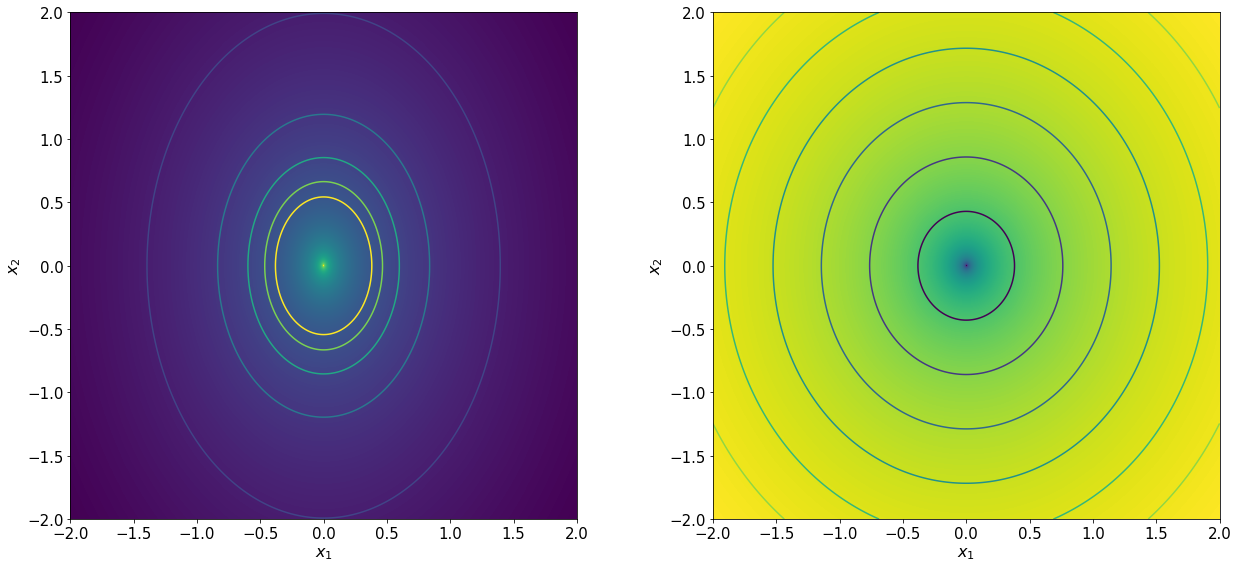

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
from matplotlib.patches import Ellipse
from scipy.optimize import fsolve, newton,brenth, brentq
%matplotlib inline

class sie_lens(object):
    
    def __init__(self,co,sigmav=200,zl=0.3,zs=2.0,f=0.6):
        from astropy.constants import c, G
        self.sigmav=sigmav
        self.co=co
        self.zl=zl
        self.zs=zs
        self.f=f
        self.dl=self.co.angular_diameter_distance(self.zl)
        self.ds=self.co.angular_diameter_distance(self.zs)
        self.dls=self.co.angular_diameter_distance_z1z2(self.zl,self.zs)
        xi0=4.0*np.pi*sigmav**2/c**2*self.dl*self.dls/self.ds
    
    def delta(self,f,phi):
        return np.sqrt(np.cos(phi)**2+self.f**2*np.sin(phi)**2)
    
    def kappa(self,x,phi):
        return(np.sqrt(self.f)/2.0/x/self.delta(self.f,phi))
    
    def gamma(self,x,phi):
        return(-self.kappa(x,phi)*np.cos(2.0*phi),
               -self.kappa(x,phi)*np.sin(2.0*phi))
    
    def mu(self,x,phi):
        ga1,ga2=self.gamma(x,phi)
        ga=np.sqrt(ga1*ga1+ga2*ga2)
        return 1.0/(1.0-self.kappa(x,phi)-ga)/(1.0-self.kappa(x,phi)+ga)

    def kappa_map(self,x_,y_):
        xk,yk=np.meshgrid(x_,y_)
        phi=np.arctan2(yk,xk)
        x=np.sqrt(xk*xk+yk*yk)
        ka=self.kappa(x,phi)
        print (ka.shape,xk.shape)
        #ka=np.array(ka).reshape([xk.size,yk.size],order='F')
        return(ka)
    
    def psi_tilde(self,phi):
        if (self.f < 1.0):
            fp=np.sqrt(1.0-self.f**2)
            return np.sqrt(self.f)/fp*(np.sin(phi)*np.arcsin(fp*np.sin(phi))+
                                       np.cos(phi)*np.arcsinh(fp/f*np.cos(phi)))
        else: 
            return(1.0)

    def psi(self,x,phi):
        psi=x*self.psi_tilde(phi)
        return psi
    
    def pot_map(self,x_,y_):
        xk,yk=np.meshgrid(x_,y_)
        phi=np.arctan2(yk,xk)
        x=np.sqrt(xk*xk+yk*yk)
        psi_map=self.psi(x,phi)
        return(np.abs(psi_map))
    
    def alpha(self,phi):
        fp=np.sqrt(1.0-self.f**2)
        a1=np.sqrt(self.f)/fp*np.arcsinh(fp/self.f*np.cos(phi))
        a2=np.sqrt(self.f)/fp*np.arcsin(fp*np.sin(phi))
        return a1,a2
    
    def alpha_map(self,x_,y_):
        xk,yk=np.meshgrid(x_,y_)
        phi=np.arctan2(yk,xk)
        x=np.sqrt(xk*xk+yk*yk)
        a1,a2=self.alpha(phi)
        return(a1,a2)
    
    def cut(self,phi_min=0,phi_max=2.0*np.pi):
        phi=np.linspace(phi_min,phi_max,1000)
        y1,y2=self.alpha(phi)
        return -y1,-y2


    def tan_caustic(self,phi_min=0,phi_max=2.0*np.pi):
        phi=np.linspace(phi_min,phi_max,1000)
        delta=np.sqrt(np.cos(phi)**2+self.f**2*np.sin(phi)**2)
        a1,a2=self.alpha(phi)
        y1=np.sqrt(self.f)/delta*np.cos(phi)-a1
        y2=np.sqrt(self.f)/delta*np.sin(phi)-a2
        return y1,y2  

    def tan_cc(self,phi_min=0,phi_max=2.0*np.pi):
        phi=np.linspace(phi_min,phi_max,1000)
        delta=np.sqrt(np.cos(phi)**2+self.f**2*np.sin(phi)**2)
        r=np.sqrt(self.f)/delta
        x1=r*np.cos(phi)
        x2=r*np.sin(phi)
        return(x1,x2) 
    
    
    def cut_intercept_y1(self):
        s1,y2_tmp=self.alpha(0.0)
        return (s1)

    def cut_intercept_y2(self):
        y1_tmp,s1=self.alpha(np.pi/2.0)
        return (s1)

    def cau_intercept_y1(self):
        a1,a2=self.alpha(np.pi/2.0)
        s1=np.sqrt(self.f)-a1
        return (s1)

    def cau_intercept_y2(self):
        a1,a2=self.alpha(np.pi/2.0)
        s1=np.sqrt(self.f)/self.f-a2
        return (s1)

    def x_ima(self,y1,y2,phi):
        x=y1*np.cos(phi)+y2*np.sin(phi)+(self.psi_tilde(phi))
        return x

    def phi_ima(self,y1,y2,checkplot=True,verbose=True):
        def phi_func(phi):
            a1,a2=self.alpha(phi)
            func=(y1+a1)*np.sin(phi)-(y2+a2)*np.cos(phi)
            return func

        U=np.linspace(0.,2.0*np.pi+0.001,100)
        c = phi_func(U)
        s = np.sign(c)
        phi=[]
        xphi=[]
        for i in range(100-1):
            if s[i] + s[i+1] == 0: # opposite signs
                u = brentq(phi_func, U[i], U[i+1])
                z = phi_func(u)
                if np.isnan(z) or abs(z) > 1e-3:
                    continue
                x=self.x_ima(y1,y2,u)
                if (x>0):
                    phi.append(u)
                    xphi.append(x)
                if (verbose):
                    print('found zero at {}'.format(u))
                    if (x<0):
                        print ('discarded because x is negative ({})'.format(x))
                    else:
                        print ('accepted because x is positive ({})'.format(x))
        if (checkplot):        
            phi_=np.linspace(0.,2.0*np.pi,100)
            ax[0].plot(phi_,phi_func(phi_),label=r'$F(\varphi)$')
            ax[0].plot(phi_,self.x_ima(y1,y2,phi_),label=r'$x(\varphi)$')
            #ax[0].plot(phi_,psi_tilde(phi_,f)-1)
            ax[0].plot(phi,phi_func(phi),'o',markersize=8)
            ax[0].set_xlabel(r'$\varphi$',fontsize=20)
            ax[0].set_ylabel(r'$F(\varphi),x(\varphi)$',fontsize=20)
            ax[0].legend(fontsize=16)
    
        return(np.array(xphi),np.array(phi))

    def ext_source(self,yc1,yc2,rs,npt=720):
        phi=np.linspace(0,2.*np.pi,npt)
        y1=yc1+rs*np.cos(phi)
        y2=yc2+rs*np.sin(phi)
        return(y1,y2)
    
    def ext_image(self,yc1,yc2,rs,npt=720):
        y1,y2=self.ext_source(yc1,yc2,rs,npt)
        x=[]
        phi=[]
        for i in range(len(y1)):
            x_,phi_=self.phi_ima(y1[i],y2[i],checkplot=False,verbose=False)
            for j in range(len(x_)):
                x.append(x_[j])
                phi.append(phi_[j])
        return(x,phi)
            
    
    #utils
    def SigmaCrit(self):
        from astropy.constants import c, G
        c2_G_Msun_Mpc = (c**2/G).to(u.Msun/u.Mpc)
        sigma_cr = c2_G_Msun_Mpc/(4*np.pi)*(self.ds/self.dl/self.dls)
        return(sigma_cr)
    

from astropy.cosmology import FlatLambdaCDM
co = FlatLambdaCDM(H0=70, Om0=0.3)

f=0.7
xmin=-2
xmax=2
ymin=-2
ymax=2
npix=1024

xk=np.linspace(xmin,xmax,npix)
yk=np.linspace(ymin,ymax,npix)

fig,ax=plt.subplots(1,2,figsize=(18,8))

sie=sie_lens(co,f=f)
kappa=sie.kappa_map(xk,yk)
ax[0].imshow(kappa,norm=LogNorm(),origin='low',extent=[xmin,xmax,ymin,ymax])
cs=ax[0].contour(kappa,levels=[0.1,0.3,0.5,0.7,0.9,1.1],extent=[xmin,xmax,ymin,ymax])

pot=sie.pot_map(xk,yk)
ax[1].imshow(pot,norm=LogNorm(),origin='low',extent=[xmin,xmax,ymin,ymax])
cs=ax[1].contour(pot,extent=[xmin,xmax,ymin,ymax])
ax[0].xaxis.set_tick_params(labelsize=15)
ax[0].yaxis.set_tick_params(labelsize=15)
ax[1].xaxis.set_tick_params(labelsize=15)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[0].set_xlabel('$x_1$',fontsize=16)
ax[0].set_ylabel('$x_2$',fontsize=16)
ax[1].set_xlabel('$x_1$',fontsize=16)
ax[1].set_ylabel('$x_2$',fontsize=16)

plt.tight_layout()

The deflection angle can be derived as usual by taking the gradient of the lensing potential. It is convenient to operate in polar coordinates, so that

$$
\frac{\partial}{\partial x_1}=\cos\varphi\frac{\partial}{\partial x}-\frac{\sin\varphi}{x}\frac{\partial}{\partial \varphi}
$$

and 

$$
\frac{\partial}{\partial x_2}=\sin\varphi\frac{\partial}{\partial x}+\frac{\cos\varphi}{x}\frac{\partial}{\partial \varphi}
$$

Then, we obtain

$$
\vec\alpha(\vec x)=\vec\nabla{\psi}=\frac{\sqrt{f}}{f'}\left[\textrm{arcsinh}\left(\frac{f'}{f}\cos\varphi\right),\arcsin(f'\sin\varphi)\right]
$$

The deflection angle of the SIE does not depend on $x$. 

The further step is the derivation of the shear components. These can be derived by means of the derivatives of the deflection angle:

$$
\gamma_1=\frac{1}{2}\left(\frac{\partial\alpha_1}{\partial x_1}-\frac{\partial\alpha_2}{\partial x_2}\right) \\
\gamma_2=\frac{\partial\alpha_1}{\partial x_2}
$$


Using polar coordinates and the results above, we find that 

$$
\gamma_1=-\frac{\sqrt{f}}{2x\Delta(\varphi)}\cos 2\varphi=-\kappa \cos 2\varphi\\
\gamma_2=-\frac{\sqrt{f}}{2x\Delta(\varphi)}\sin 2\varphi=-\kappa \sin 2\varphi
$$

or, in other words, $\gamma=\kappa$. 

Once we have the shear, we can compute the lensing Jacobian. After some math, we can see that

$$
A=\left[ \begin{array}{c} 1-\kappa-\gamma_1 & -\gamma_2 \\ \gamma_2 & 1-\kappa+\gamma_1 \end{array} \right] = \begin{bmatrix} 1-2\kappa\sin^2\varphi & \kappa\sin 2\varphi \\  \kappa\sin 2\varphi & 1-2\kappa\cos^2\varphi \end{bmatrix} 
$$

and that 

$$ 
\lambda_t=1-\kappa-\gamma=1-2\kappa \\
\lambda_r=1-\kappa+\gamma=1
$$

It turns out that, as the SIS, the SIE does not have a critical line, being the radial magnification always unity. The tangential critical line is the ellipse where 

$$
\kappa=\frac{1}{2}
$$

meaning that 
$$
\vec x_t(\varphi)=\frac{\sqrt{f}}{\Delta(\varphi)}\left[\cos\varphi, \sin\varphi\right] \;.
$$

The critical line for the same lens used in the examples above is shown in the right panel below. This line can be mapped onto the source plane using the lens equation, to obtain the tangential caustic:

$$
y_{t,1}=\frac{\sqrt{f}}{\Delta(\varphi)}\cos\varphi-\frac{\sqrt{f}}{f'}\textrm{arcsinh}\left(\frac{f'}{f}\cos\varphi\right)
$$
$$
y_{t,2}=\frac{\sqrt{f}}{\Delta(\varphi)}\sin\varphi-\frac{\sqrt{f}}{f'}\arcsin(f'\sin\varphi)
$$

As for the SIS, we can now search for the **cut**:

$$
\vec y_{c}=\lim_{x\rightarrow 0} \vec y(x,\varphi)=-\vec\alpha(\varphi)
$$

Thus,
$$
y_{c,1}=-\frac{\sqrt{f}}{f'}\textrm{arcsinh}\left(\frac{f'}{f}\cos\varphi\right)
$$
$$
y_{c,2}=-\frac{\sqrt{f}}{f'}\arcsin(f'\sin\varphi)
$$

Both the caustic and the cut are shown below in the left panel (red and blue curves, respectively).

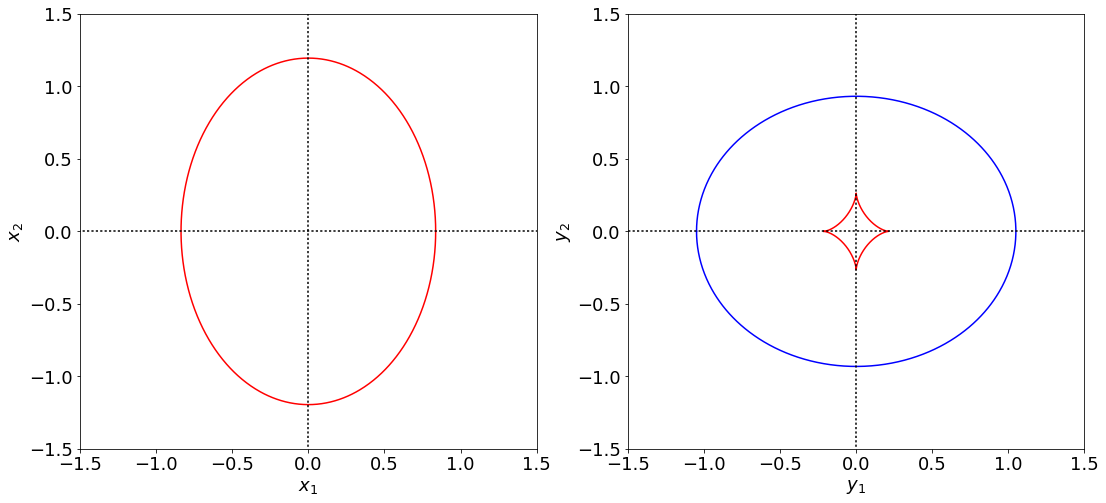

In [10]:
def showaxes(ax):
    x=[-100,100]
    y=[0,0]   
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.plot(x,y,':',color='black')
    ax.plot(y,x,':',color='black')
    return

fig,ax=plt.subplots(1,2,figsize=(18,8))
y1_cut,y2_cut=sie.cut()
y1_cau,y2_cau=sie.tan_caustic()
x1_cc,x2_cc=sie.tan_cc()

ax[0].set_xlim([-1.5,1.5])
ax[0].set_ylim([-1.5,1.5])
ax[1].set_xlim([-1.5,1.5])
ax[1].set_ylim([-1.5,1.5])
ax[1].plot(y1_cut,y2_cut,'-',color='blue')
ax[1].plot(y1_cau,y2_cau,'-',color='red')
ax[0].plot(x1_cc,x2_cc,'-',color='red')

showaxes(ax[0])
showaxes(ax[1])
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=18)
    ax[i].yaxis.set_tick_params(labelsize=18)

ax[0].set_xlabel('$x_1$',fontsize=18)
ax[0].set_ylabel('$x_2$',fontsize=18)
ax[1].set_xlabel('$y_1$',fontsize=18)
ax[1].set_ylabel('$y_2$',fontsize=18)

The figures below shows how critical lines, caustics, and cut change by varying the ellipticity of the lens:

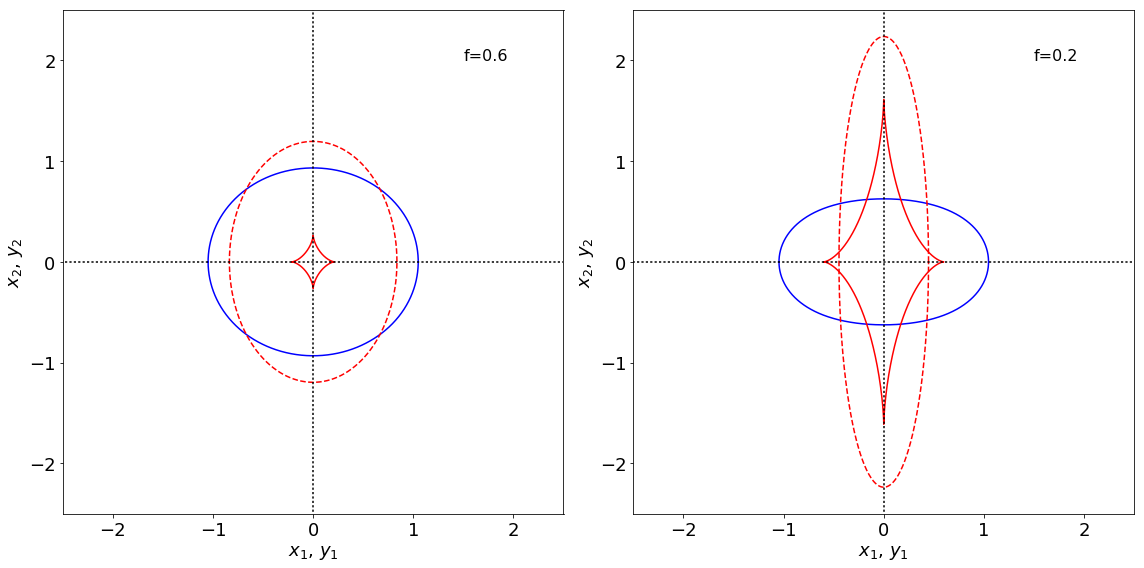

In [11]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
y1_cut,y2_cut=sie.cut()
y1_cau,y2_cau=sie.tan_caustic()
x1_cc,x2_cc=sie.tan_cc()

xmin,xmax=-2.5,2.5

ax[0].set_xlim([xmin,xmax])
ax[0].set_ylim([xmin,xmax])
ax[1].set_xlim([xmin,xmax])
ax[1].set_ylim([xmin,xmax])

ax[0].plot(y1_cut,y2_cut,'-',color='blue')
ax[0].plot(y1_cau,y2_cau,'-',color='red')
ax[0].plot(x1_cc,x2_cc,'--',color='red')

sie2=sie_lens(co,f=0.2)
y1_cut,y2_cut=sie2.cut()
y1_cau,y2_cau=sie2.tan_caustic()
x1_cc,x2_cc=sie2.tan_cc()

ax[1].plot(y1_cut,y2_cut,'-',color='blue')
ax[1].plot(y1_cau,y2_cau,'-',color='red')
ax[1].plot(x1_cc,x2_cc,'--',color='red')

showaxes(ax[0])
showaxes(ax[1])
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=18)
    ax[i].yaxis.set_tick_params(labelsize=18)

ax[0].set_xlabel('$x_1$, $y_1$',fontsize=18)
ax[0].set_ylabel('$x_2$, $y_2$',fontsize=18)
ax[1].set_xlabel('$x_1$, $y_1$',fontsize=18)
ax[1].set_ylabel('$x_2$, $y_2$',fontsize=18)

ax[0].text(1.5,2.0,'f=0.6',fontsize=16)
ax[1].text(1.5,2.0,'f=0.2',fontsize=16)

plt.tight_layout()

The cut and the caustic intercept the $y_1$ and the $y_2$ axes in points that are symmetric with respect to the center of the lens. These points have coordinates

$$
y_{c,1}(\varphi=0,\pi)=\pm s_{1,c}\\
y_{c,2}=0
$$

and

$$
y_{c,1}=0 \\
y_{c,2}(\varphi=\pi/2,-\pi/2)=\pm s_{2,c}
$$

for the cut, and 

$$
y_{t,1}(\varphi=0,\pi)=\pm s_{1,t}\\
y_{t,2}=0
$$

and

$$
y_{t,1}=0 \\
y_{t,2}(\varphi=\pi/2,-\pi/2)=\pm s_{2,t}
$$

for the caustic.

The plot below shows $s_1$ and $s_2$ vary as a function of $f$ for both the cut and the caustic. Clearly

$$
s_{1,c}>s_{1,t}
$$

for any $f$, while there exists a value $f=f_0=0.3942$ such that

$$ 
s_{2,c}\leq s_{2,t} \; \textrm{for} \; f \leq f_0 \\
s_{2,c} > s_{2,t} \; \textrm{for}\; f > f_0
$$

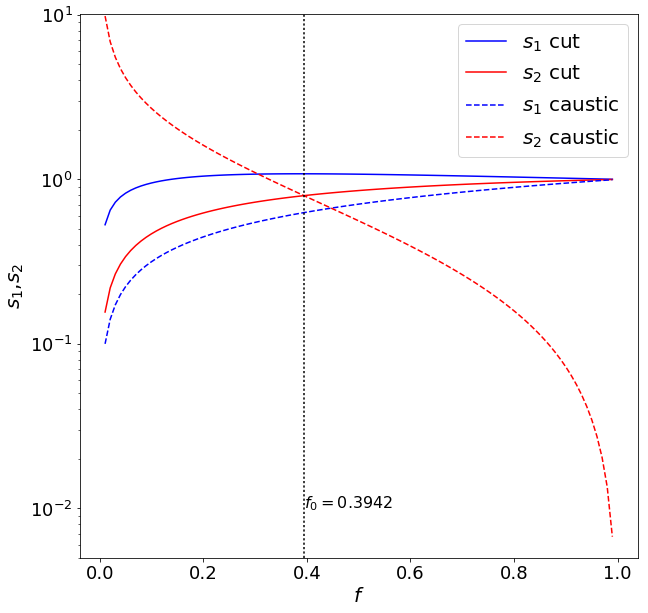

In [12]:
f_arr=np.linspace(0.01,0.99,100)
s1_cut=[]
s2_cut=[]
s1_cau=[]
s2_cau=[]
for f in f_arr:
    sie_=sie_lens(co,f=f)
    s1_cut.append(sie_.cut_intercept_y1())
    s2_cut.append(sie_.cut_intercept_y2())
    s1_cau.append(sie_.cau_intercept_y1())
    s2_cau.append(sie_.cau_intercept_y2())


fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.set_ylim([5e-3,10.1])
ax.plot(f_arr,s1_cut,'-',color='blue',label='$s_1$ cut')
ax.plot(f_arr,s2_cut,'-',color='red',label='$s_2$ cut')
ax.plot(f_arr,s1_cau,'--',color='blue',label='$s_1$ caustic')
ax.plot(f_arr,s2_cau,'--',color='red',label='$s_2$ caustic')
ylim=ax.get_ylim()
ax.plot([0.3942,0.3942],ylim,':',color='black')
ax.set_yscale('log')
ax.legend(loc='best',fontsize=20)
ax.text(0.3942,1e-2,'$f_0=0.3942$',fontsize=16)
ax.set_xlabel('$f$',fontsize=20)
ax.set_ylabel('$s_1$,$s_2$',fontsize=20)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

Thus, when the ellipticity exceeds a certain value, the caustic is no longer fully contained into the cut. This will impact the image multiplicity, as it will be discussed below.

# Multiple images

Kormann, Bartelmann & Schneider (1994) discuss an approach to find the images of a source lensed by the SIE. Beginning with the lens equation, and multiplying $y_1$ by $\cos\varphi$ and $y_2$ by $\sin\varphi$, the lens equation can be reduced to the one-dimensional equation

$$
y_1\cos\varphi=x_1\cos\varphi-\alpha_1(\vec x)\cos\varphi=x\cos^2\varphi-\alpha(x,\varphi)\cos^2\varphi
$$

$$
y_2\sin\varphi=x_2\sin\varphi-\alpha_2(\vec x)\sin\varphi=x\sin^2\varphi-\alpha(x,\varphi)\sin^2\varphi
$$

$$
\alpha(x,\varphi)=\tilde{\psi} (\varphi)
$$

$$
x=y_1\cos\varphi+y_2\sin\varphi+\tilde{\psi} (\varphi)
$$

By reinserting this equation into the lens equation, we obtain

$$
F(\varphi)=\left[y_1+\frac{\sqrt{f}}{f'}\textrm{arcsinh}\left(\frac{f'}{f}\cos\varphi\right)\right]\sin\varphi-\left[y_2+\frac{\sqrt{f}}{f'}\arcsin(f'\sin\varphi)\right]\cos\varphi=0
$$

Now the problem of finding the images of the source at $(y_1,y_2)$ reduces to the problem of finding the zeros of $F(\varphi)$. Indeed, once $\varphi$ has been determined, it can be inserted in the equation above to obtain $x$. 

The solutions cannot be found analytically: a root finding algorithm such as the Brent's method must be employed.

found zero at 1.3052712064990197
accepted because x is positive (0.8849326711616692)
found zero at 3.141592653589793
accepted because x is positive (1.1637267744876012)
found zero at 4.977914100680565
accepted because x is positive (0.8849326711616692)
found zero at 6.283185307179586
accepted because x is positive (0.9637267744876011)


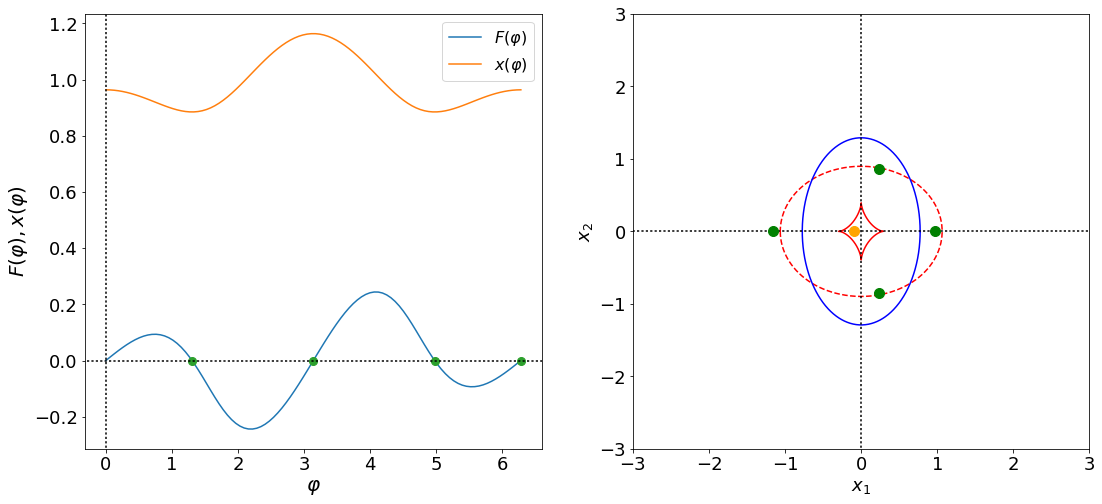

In [13]:
from scipy.optimize import fsolve, newton,brenth, brentq
#from sympy import *
import math


fig,ax=plt.subplots(1,2,figsize=(18,8))

f=0.6
y1=-0.1
y2=0.0
sie=sie_lens(co,f=f)
x,phi=sie.phi_ima(y1,y2)

x1_ima=x*np.cos(phi)
x2_ima=x*np.sin(phi)

y1_cut,y2_cut=sie.cut()
y1_cau,y2_cau=sie.tan_caustic()
x1_cc,x2_cc=sie.tan_cc()

ax[1].set_xlim([-3,3])
ax[1].set_ylim([-3,3])
ax[1].plot(y1_cut,y2_cut,'--',color='red')
ax[1].plot(y1_cau,y2_cau,'-',color='red')
ax[1].plot(x1_cc,x2_cc,'-',color='blue')
showaxes(ax[0])
showaxes(ax[1])

ax[1].plot(y1,y2,'o',markersize=10,color='orange')
ax[1].plot(x1_ima,x2_ima,'o',markersize=10,color='green')

for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=18)
    ax[i].yaxis.set_tick_params(labelsize=18)
    
ax[1].set_xlabel('$x_1$',fontsize=18)
ax[1].set_ylabel('$x_2$',fontsize=18)

The two curves in the left panel show the functions $F(\varphi)$ and $x(\varphi;y_1,y_2)$. The zeros of $F$ are marked in red and the corresponding images are shown in the right panel with green circles. Shown are also the caustic (solid-red), the cut (dashed-red) and the critical line (solid-blue). The source position is indicated by the yellow dot. 

Note that some zeros of $F$ are actually spurious solutions and must be rejected. We recongnize them by means of the sign of $x$: whenever it is negative, we reject the solution.

We can now study the multiple image configurations arising from sources at different positions. In the following examples, we consider the case $f>f_0$. We show below the images of sources at different positions, including sources on the cusps and on the folds of the caustic.

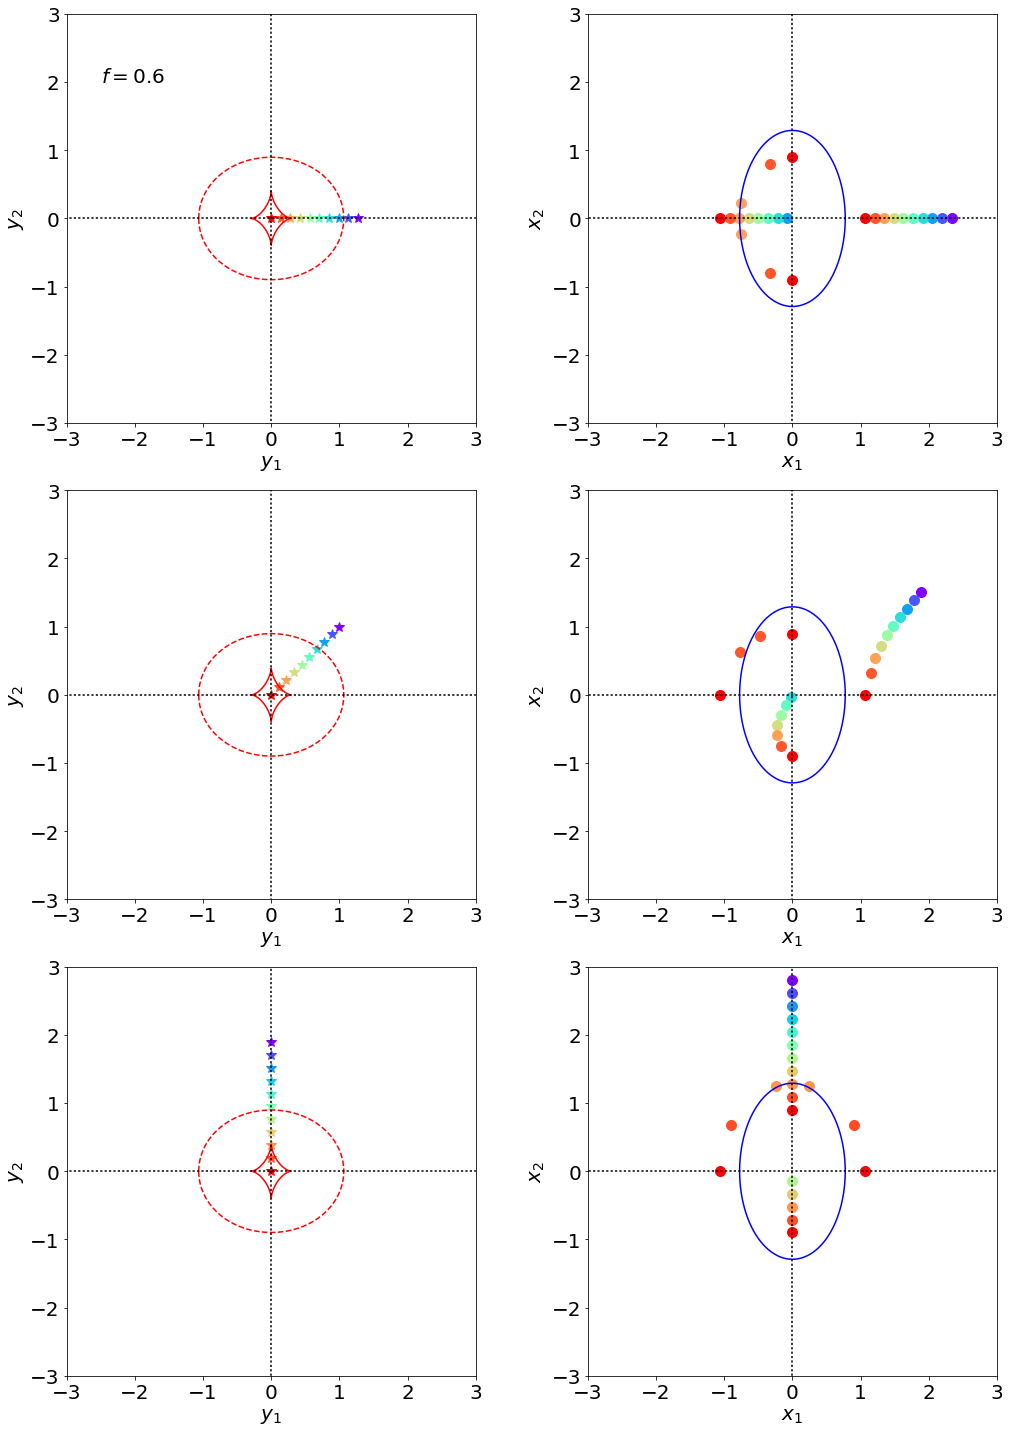

In [14]:
from matplotlib.pyplot import cm 

fig,ax=plt.subplots(3,2,figsize=(15,20))
f=0.6
sie=sie_lens(co,f=f)

# source on the y1 axis, moving from outside the cut towards the center of the lens
y1=np.linspace(1.27,0,10)
y2=np.zeros(y1.size)

color=iter(cm.rainbow(np.linspace(0,1,y1.size)))
for i in range(y1.size):
    c=next(color)
    x,phi=sie.phi_ima(y1[i],y2[i],checkplot=False,verbose=False)

    x1_ima=x*np.cos(phi)
    x2_ima=x*np.sin(phi)
    
    ax[0,0].plot(y1[i],y2[i],'*',markersize=10,color=c)
    ax[0,1].plot(x1_ima,x2_ima,'o',markersize=10,color=c)

# source on the diagonal, moving from outside the cut towards the center of the lens
y1=np.linspace(1.0,0,10)
y2=y1

color=iter(cm.rainbow(np.linspace(0,1,y1.size)))
for i in range(y1.size):
    c=next(color)
    x,phi=sie.phi_ima(y1[i],y2[i],checkplot=False,verbose=False)

    x1_ima=x*np.cos(phi)
    x2_ima=x*np.sin(phi)
    
    ax[1,0].plot(y1[i],y2[i],'*',markersize=10,color=c)
    ax[1,1].plot(x1_ima,x2_ima,'o',markersize=10,color=c)

# source on the y2 axis, moving from outside the cut towards the center of the lens
y2=np.linspace(1.9,0,11)
y1=np.zeros(y2.size)

color=iter(cm.rainbow(np.linspace(0,1,y1.size)))
for i in range(y1.size):
    c=next(color)
    x,phi=sie.phi_ima(y1[i],y2[i],checkplot=False,verbose=False)

    x1_ima=x*np.cos(phi)
    x2_ima=x*np.sin(phi)
    
    ax[2,0].plot(y1[i],y2[i],'*',markersize=10,color=c)
    ax[2,1].plot(x1_ima,x2_ima,'o',markersize=10,color=c)
    
y1_cut,y2_cut=sie.cut()
y1_cau,y2_cau=sie.tan_caustic()
x1_cc,x2_cc=sie.tan_cc()

for i in range(3):
    ax[i,1].set_xlim([-3,3])
    ax[i,1].set_ylim([-3,3])
    ax[i,0].set_xlim([-3,3])
    ax[i,0].set_ylim([-3,3])
    ax[i,0].plot(y1_cut,y2_cut,'--',color='red')
    ax[i,0].plot(y1_cau,y2_cau,'-',color='red')
    ax[i,1].plot(x1_cc,x2_cc,'-',color='blue')
    ax[i,1].set_xlabel('$x_1$',fontsize=20)
    ax[i,1].set_ylabel('$x_2$',fontsize=20)
    ax[i,0].set_xlabel('$y_1$',fontsize=20)
    ax[i,0].set_ylabel('$y_2$',fontsize=20)
    showaxes(ax[i,0])
    showaxes(ax[i,1])

for i in range(3):
    for j in range(2):
        ax[i,j].xaxis.set_tick_params(labelsize=20)
        ax[i,j].yaxis.set_tick_params(labelsize=20)
        ax[i,j].set_aspect('equal')
    


ax[0,0].text(-2.5,2,'$f=$'+str(f),fontsize=20)
plt.tight_layout()

The examples shown so far illustrate that in the case $f<f_0$:

* a source outside the cut always produces one image;

* inside the cut, but outside the caustic, it produces two images. The image multiplicity increases by one only because of the singularity at the center of the lens

* inside the caustic, it produces four images (thus, the multiplicity changes by two when crossing the caustic)

For $f>f_0$, the upper and the lower cusps of the caustic become "naked". The regions outside the cut but inside the caustic have multiplicity three. In this case, the lens can produce one, two, three, or four images. Check this out in the example below.

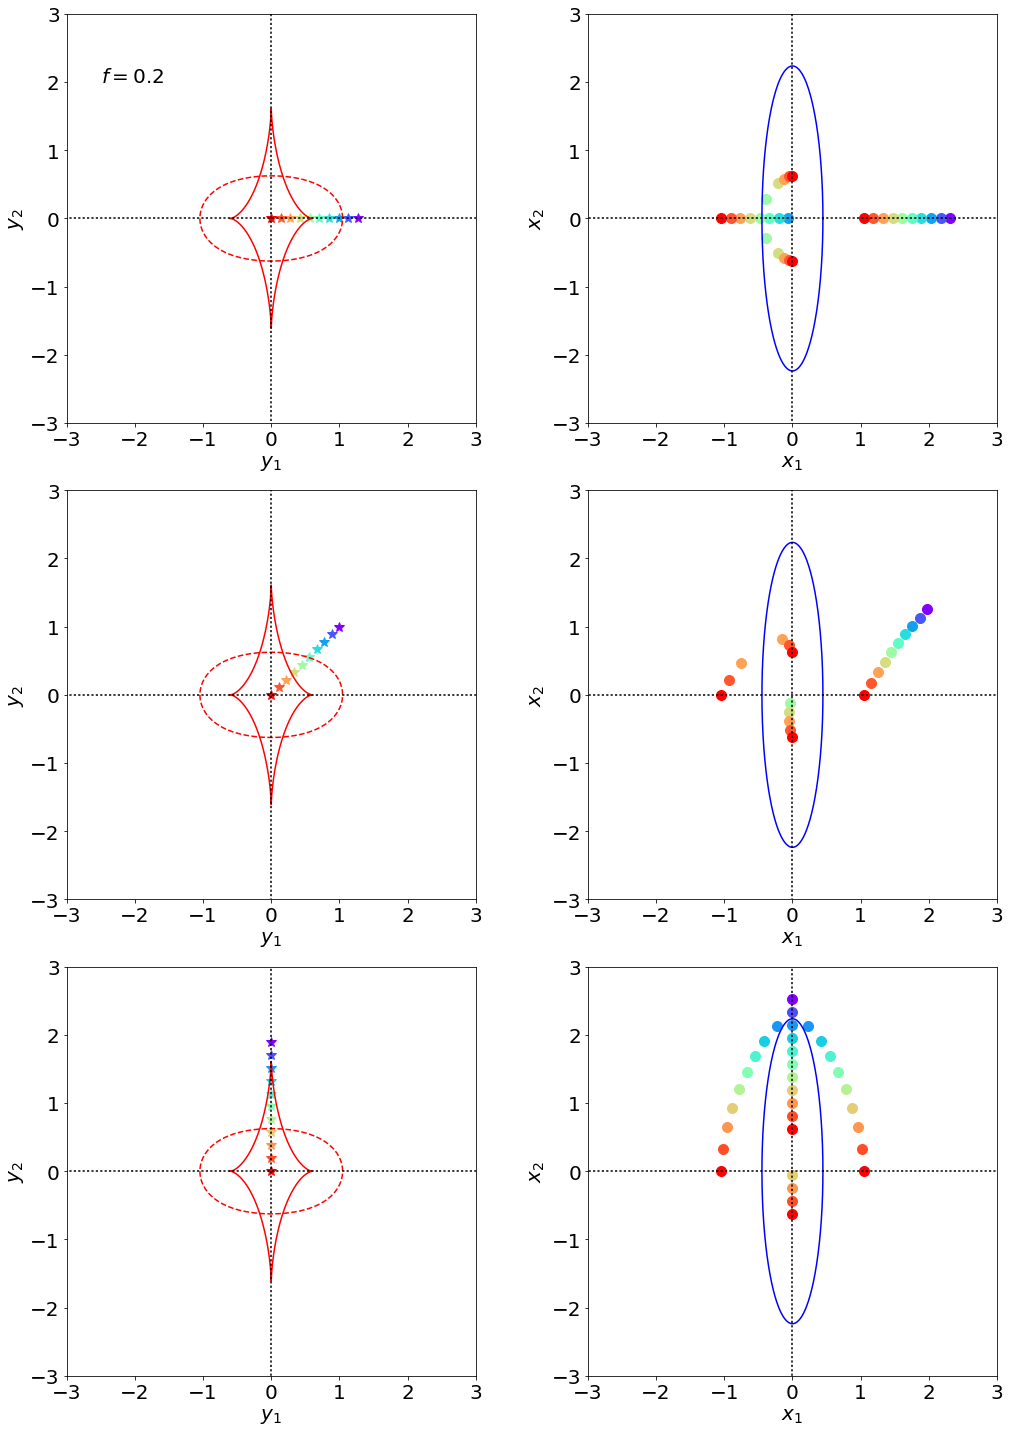

In [15]:
from matplotlib.pyplot import cm 

fig,ax=plt.subplots(3,2,figsize=(15,20))
f=0.2
sie=sie_lens(co,f=f)

# source on the y1 axis, moving from outside the cut towards the center of the lens
y1=np.linspace(1.27,0,10)
y2=np.zeros(y1.size)

color=iter(cm.rainbow(np.linspace(0,1,y1.size)))
for i in range(y1.size):
    c=next(color)
    x,phi=sie.phi_ima(y1[i],y2[i],checkplot=False,verbose=False)

    x1_ima=x*np.cos(phi)
    x2_ima=x*np.sin(phi)
    
    ax[0,0].plot(y1[i],y2[i],'*',markersize=10,color=c)
    ax[0,1].plot(x1_ima,x2_ima,'o',markersize=10,color=c)

# source on the diagonal, moving from outside the cut towards the center of the lens
y1=np.linspace(1.0,0,10)
y2=y1

color=iter(cm.rainbow(np.linspace(0,1,y1.size)))
for i in range(y1.size):
    c=next(color)
    x,phi=sie.phi_ima(y1[i],y2[i],checkplot=False,verbose=False)

    x1_ima=x*np.cos(phi)
    x2_ima=x*np.sin(phi)
    
    ax[1,0].plot(y1[i],y2[i],'*',markersize=10,color=c)
    ax[1,1].plot(x1_ima,x2_ima,'o',markersize=10,color=c)

# source on the y2 axis, moving from outside the cut towards the center of the lens
y2=np.linspace(1.9,0,11)
y1=np.zeros(y2.size)

color=iter(cm.rainbow(np.linspace(0,1,y1.size)))
for i in range(y1.size):
    c=next(color)
    x,phi=sie.phi_ima(y1[i],y2[i],checkplot=False,verbose=False)

    x1_ima=x*np.cos(phi)
    x2_ima=x*np.sin(phi)
    
    ax[2,0].plot(y1[i],y2[i],'*',markersize=10,color=c)
    ax[2,1].plot(x1_ima,x2_ima,'o',markersize=10,color=c)
    
y1_cut,y2_cut=sie.cut()
y1_cau,y2_cau=sie.tan_caustic()
x1_cc,x2_cc=sie.tan_cc()

for i in range(3):
    ax[i,1].set_xlim([-3,3])
    ax[i,1].set_ylim([-3,3])
    ax[i,0].set_xlim([-3,3])
    ax[i,0].set_ylim([-3,3])
    ax[i,0].plot(y1_cut,y2_cut,'--',color='red')
    ax[i,0].plot(y1_cau,y2_cau,'-',color='red')
    ax[i,1].plot(x1_cc,x2_cc,'-',color='blue')
    ax[i,1].set_xlabel('$x_1$',fontsize=20)
    ax[i,1].set_ylabel('$x_2$',fontsize=20)
    ax[i,0].set_xlabel('$y_1$',fontsize=20)
    ax[i,0].set_ylabel('$y_2$',fontsize=20)
    showaxes(ax[i,0])
    showaxes(ax[i,1])

for i in range(3):
    for j in range(2):
        ax[i,j].xaxis.set_tick_params(labelsize=20)
        ax[i,j].yaxis.set_tick_params(labelsize=20)
        ax[i,j].set_aspect('equal')
    


ax[0,0].text(-2.5,2,'$f=$'+str(f),fontsize=20)
plt.tight_layout()

Some comments on the magnification and parity:

* $\mu$ is 

$$
\mu=\frac{1}{1-2\kappa} \;,
$$

meaning that $\mu>0$ for $\kappa<0.5$. Therefore, the parity of the images is positive outside the critical line, negative otherwise.
* the magnification of the images forming near the center of the lens is very small $|\mu|\sim 0$, being $\kappa$ divergent
* the magnification of the images near the critical line is divergent, of course...

Magnification and distortion are better understood using extended sources. In the examples below, we implement the reconstruction of the images of a circular source. The code can be changed to see how the results are affected by the size of the source or by its shape. 

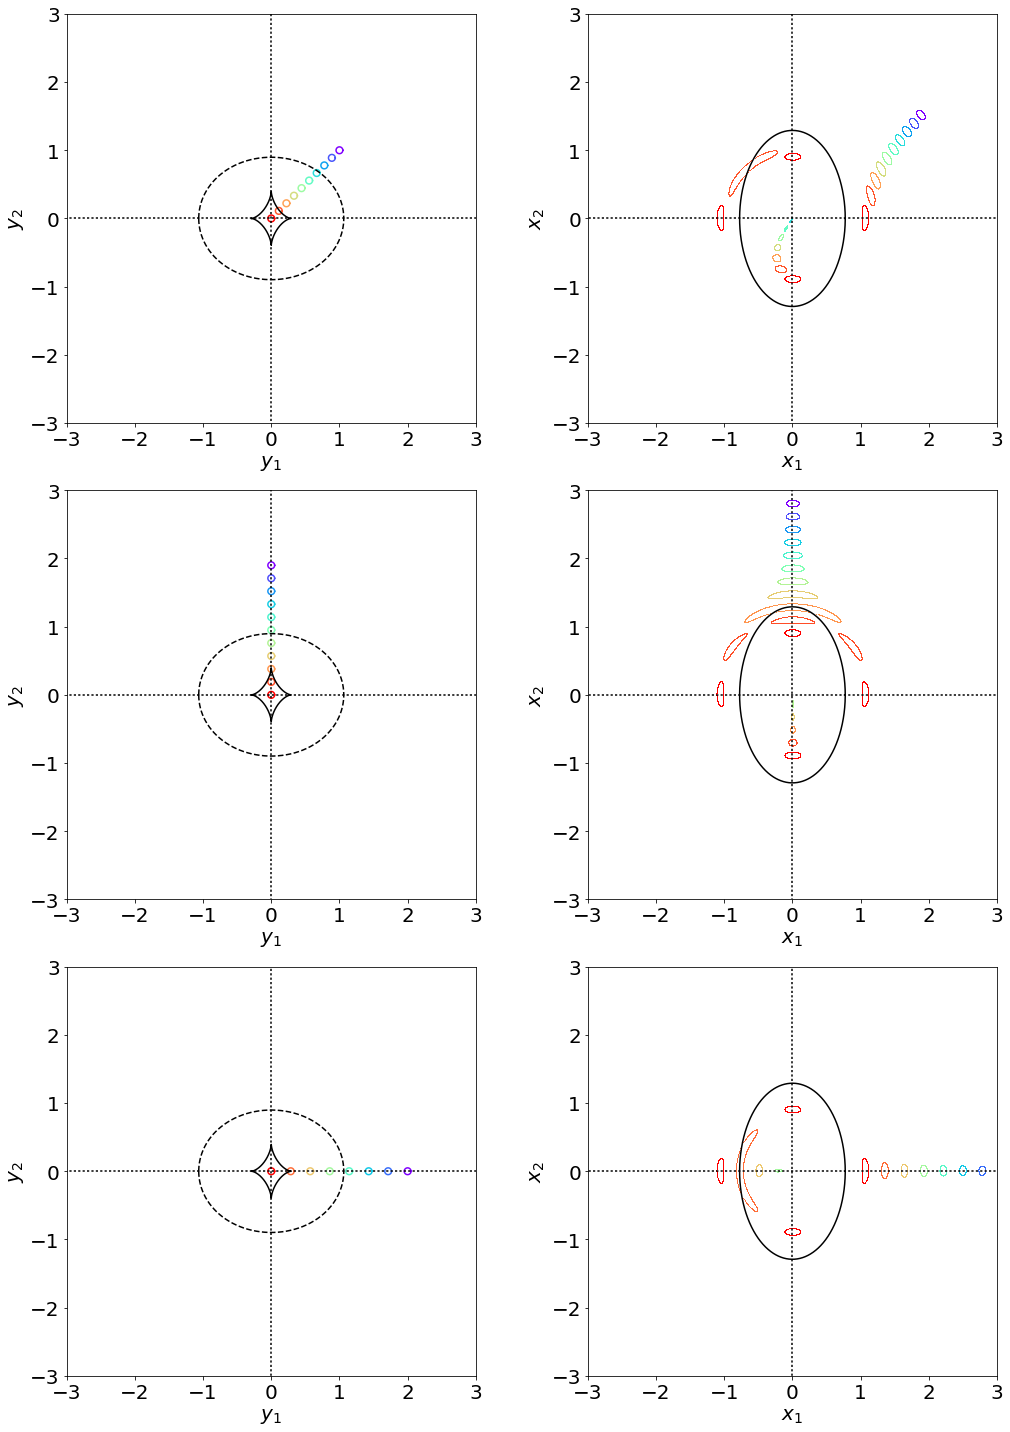

In [16]:
fig,ax=plt.subplots(3,2,figsize=(15,20))

y1c=np.linspace(1.0,0,10)
y2c=y1c
rs=0.05
f=0.6
sie=sie_lens(co,f=f)

color=iter(cm.rainbow(np.linspace(0,1,y1c.size)))


for j in range(y1c.size):
    c=next(color)
    y1,y2=sie.ext_source(y1c[j],y2c[j],rs)
    ax[0,0].plot(y1,y2,'-',color=c)
    
    x,phi=sie.ext_image(y1c[j],y2c[j],rs)
    x1=x*np.cos(phi)
    x2=x*np.sin(phi)
    ax[0,1].plot(x1,x2,',',color=c)

y2c=np.linspace(1.9,0,11)
y1c=np.zeros(y2c.size)    

color=iter(cm.rainbow(np.linspace(0,1,y1c.size)))
for j in range(y1c.size):
    c=next(color)
    y1,y2=sie.ext_source(y1c[j],y2c[j],rs)
    ax[1,0].plot(y1,y2,'-',color=c)
    
    x,phi=sie.ext_image(y1c[j],y2c[j],rs)
    x1=x*np.cos(phi)
    x2=x*np.sin(phi)
    ax[1,1].plot(x1,x2,',',color=c)

y1c=np.linspace(2,0,8)
y2c=np.zeros(y1c.size)

color=iter(cm.rainbow(np.linspace(0,1,y1c.size)))
for j in range(y1c.size):
    c=next(color)
    y1,y2=sie.ext_source(y1c[j],y2c[j],rs)
    ax[2,0].plot(y1,y2,'-',color=c)
    
    x,phi=sie.ext_image(y1c[j],y2c[j],rs)
    x1=x*np.cos(phi)
    x2=x*np.sin(phi)
    ax[2,1].plot(x1,x2,',',color=c)

y1_cut,y2_cut=sie.cut()
y1_cau,y2_cau=sie.tan_caustic()
x1_cc,x2_cc=sie.tan_cc()

for i in range(3):
    for j in range(2):
    
        ax[i,j].set_xlim([-3,3])
        ax[i,j].set_ylim([-3,3])
        ax[i,j].xaxis.set_tick_params(labelsize=20)
        ax[i,j].yaxis.set_tick_params(labelsize=20)
        showaxes(ax[i,j])
        ax[i,j].set_aspect('equal')

for i in range(3):
    ax[i,0].plot(y1_cut,y2_cut,'--',color='black')
    ax[i,0].plot(y1_cau,y2_cau,'-',color='black')
    ax[i,1].plot(x1_cc,x2_cc,'-',color='black')
    ax[i,1].set_xlabel('$x_1$',fontsize=20)
    ax[i,1].set_ylabel('$x_2$',fontsize=20)
    ax[i,0].set_xlabel('$y_1$',fontsize=20)
    ax[i,0].set_ylabel('$y_2$',fontsize=20)

plt.tight_layout()

The example below shows how a big source (compared to the lens caustics) is distorted:

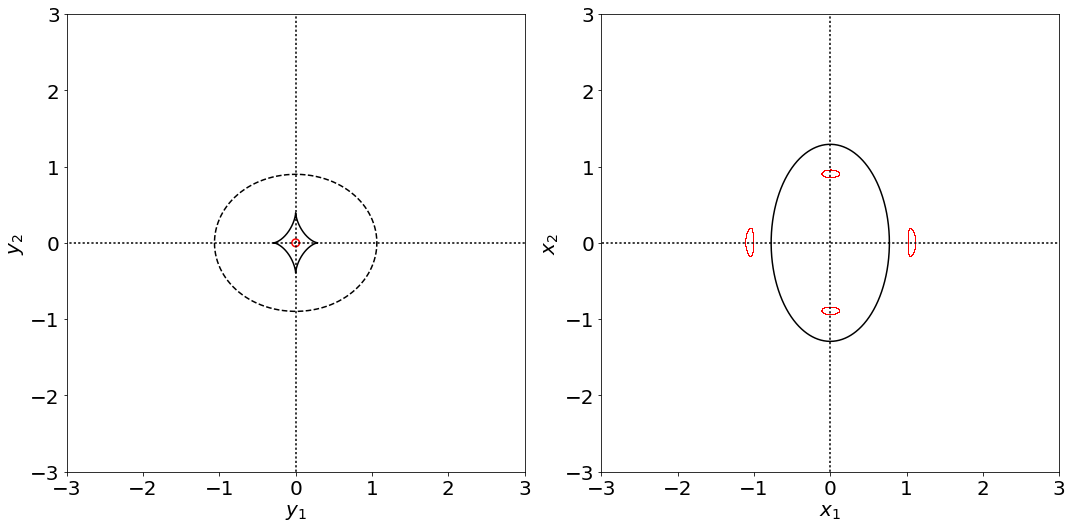

In [17]:
fig,ax=plt.subplots(1,2,figsize=(15,8))

y1c=0.0
y2c=0.0
rs=0.05
f=0.6
sie=sie_lens(co,f=f)

y1,y2=sie.ext_source(y1c,y2c,rs)
ax[0].plot(y1,y2,'-',color=c)
    
x,phi=sie.ext_image(y1c,y2c,rs,npt=10000)
x1=x*np.cos(phi)
x2=x*np.sin(phi)
ax[1].plot(x1,x2,',',color=c)

y1_cut,y2_cut=sie.cut()
y1_cau,y2_cau=sie.tan_caustic()
x1_cc,x2_cc=sie.tan_cc()

for i in range(2):
    ax[i].set_xlim([-3,3])
    ax[i].set_ylim([-3,3])
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    showaxes(ax[i])
    ax[i].set_aspect('equal')

ax[0].plot(y1_cut,y2_cut,'--',color='black')
ax[0].plot(y1_cau,y2_cau,'-',color='black')
ax[1].plot(x1_cc,x2_cc,'-',color='black')
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)

plt.tight_layout()

# NIE lens model

The Non-singular Isothermal Ellipsoid have a surface density given by
$$
\Sigma(\vec \xi)=\frac{\sigma^2}{2G}\frac{\sqrt{f}}{\sqrt{\xi_1^2+f^2\xi_2^2+\xi_c^2}}
$$

Using the dimensionless notation, the corresponding convergence is 
$$
\kappa(\vec x)=\frac{\sqrt{f}}{2\sqrt{x_1^2+f^2x_2^2+x_c^2}}
$$

The possible topologies of the critical lines and caustics are discussed by Kormann et al. (1994). In particular, they show that:

* if $x_c<f^{3/2}/2$ there are two distinguished critical lines and caustics. One caustic is the tangential caustic and has four cusps. The other is the radial one and it has not cusps. The tangential caustic is completely contained within the radial caustic if the ellipticity is small ($f$ is large). Even in the case of mildly elliptical lenses, the radial caustic contains the tangential caustic if the core is small enough;
* if $f^{3/2}/2<xc<f^{3/2}/(1+f)$, the radial caustic is contained within the tangential caustic. In addition both the radial and the tangential caustics have only two cusps;
* if $f^{3/2}/(1+f)<xc<f^{1/2}/(1+f)$, the lens has only a tangential critical line and caustic. The radial critical lines and caustics disappear for $xc=f^{3/2}/(1+f)$;
* even the tangential caustic disappears if $xc=f^{1/2}/(1+f)$. Thus, for $xc>f^{1/2}/(1+f)$ the lens does not have critical lines and caustics.

In order to study the properties of these lenses, we use the module ```mynewdeflector``` (see ```mynewdeflector.py```). In short: we use a convergence map to generate a deflector, whose potential is computed by solving a 2D poisson equation. All properties of the lens are then derived by means of the first and second derivatives of the potential.

1024 1024 <class 'numpy.ndarray'>


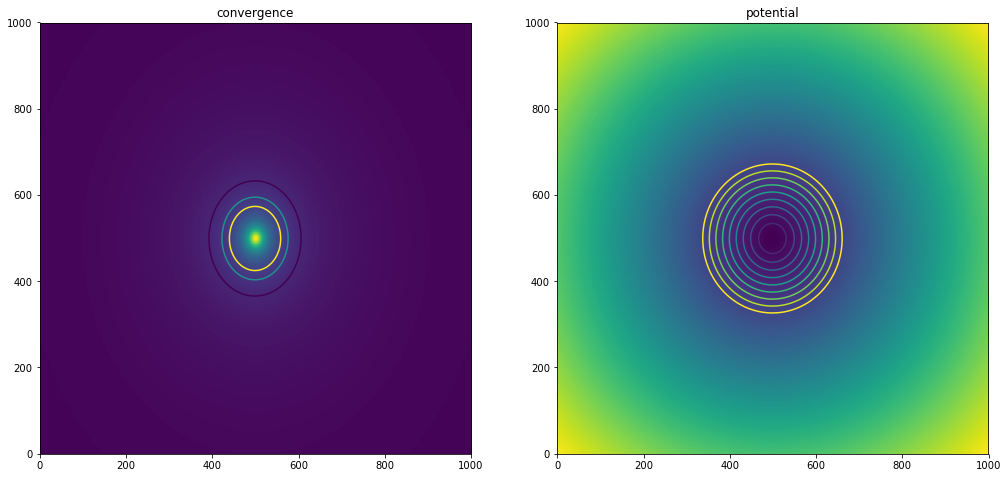

In [18]:
from mynewdeflector import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm
%matplotlib inline

def kappa_nie(xk,yk,f,xc):    
    x1,x2=np.meshgrid(xk,yk)
    mappa=np.sqrt(f)/2.0/np.sqrt(x1**2+f**2*x2**2+xc**2)
    return(mappa)

f=0.8
xc=0.1
npix=1024
xmin=-5.0
xmax=-xmin
ymin=xmin
ymax=xmax
x1=np.linspace(xmin,xmax,npix)
x2=np.linspace(xmin,xmax,npix)
kappa=kappa_nie(x1,x2,f,xc)
cdelt=(np.max(x1)-np.min(x1))/(npix-1.0)

df=deflector_from_map(kappa=kappa,pixel=cdelt,pad=True,npix=1000,size=8.0)

kappa=df.convergence()
pot=df.pot

fig,ax = plt.subplots(1,2,figsize=(17,8))
ax[0].imshow(kappa,origin="lower")
ax[0].contour(kappa,levels=[0.5,0.7,0.9])
ax[0].set_title('convergence')
ax[1].imshow(pot,origin="lower")
ax[1].contour(pot,levels=np.linspace(np.min(pot),np.min(pot)+1,10))
ax[1].set_title('potential')

The following shows the critical lines and caustics.

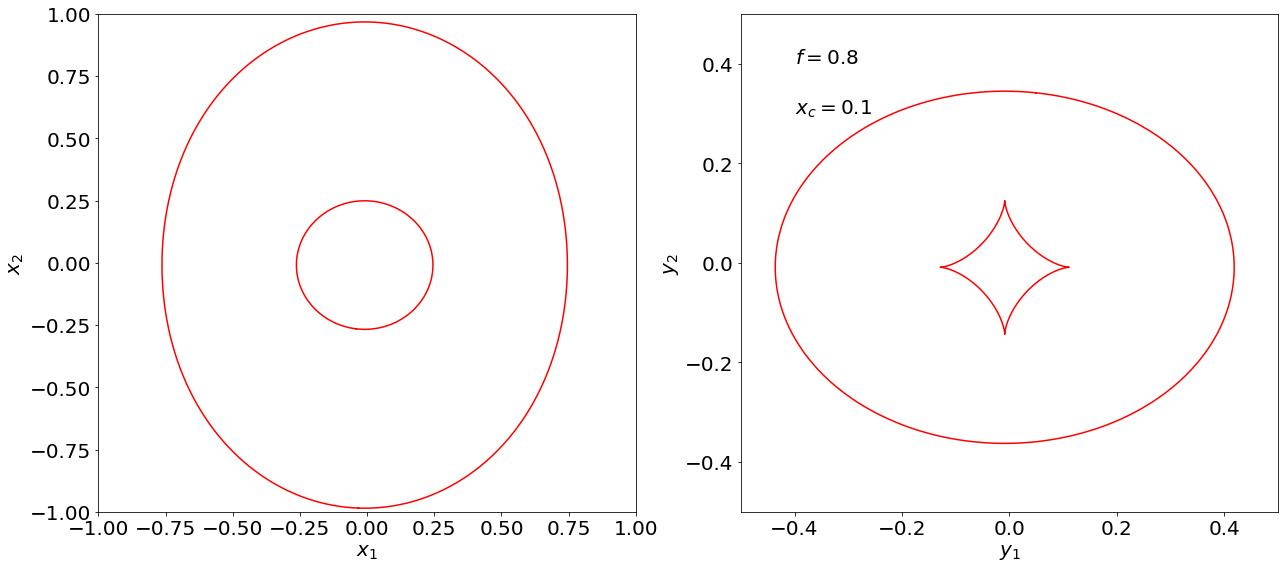

In [19]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
df.clines(ax=ax[0])
df.caustics(ax=ax[1])
        
ax[1].set_xlim([-0.5,0.5])
ax[1].set_ylim([-0.5,0.5])
ax[0].set_xlim([-1,1])
ax[0].set_ylim([-1,1])
                      
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)

ax[1].text(-0.4,0.4,'$f=$'+str(f),fontsize=20)
ax[1].text(-0.4,0.3,'$x_c=$'+str(xc),fontsize=20)
plt.tight_layout()

# Pseudo Elliptical Lenses

Pseudo-elliptical lenses are generally referred as lenses generated by ellipticizing the lensing potential rather than the surface density distribution.
In other words:

$$
\psi(\vec x)=\psi(\sqrt{x_1^2+f^2x_2^2})
$$

The great advantage of dealing with the potential is that all lens properties can be derived more easily by means of its derivatives (see the deflector module). 

We may try to build a pseudo-elliptical softened isothermal sphere as follows:
$$
\psi(\vec x)=\sqrt{x_1^2+f^2x_2^2+x_c^2}
$$

A class ```psie``` to generate lenses with elliptical potentials (with and without core) is included in the ```mynewdeflector``` module.

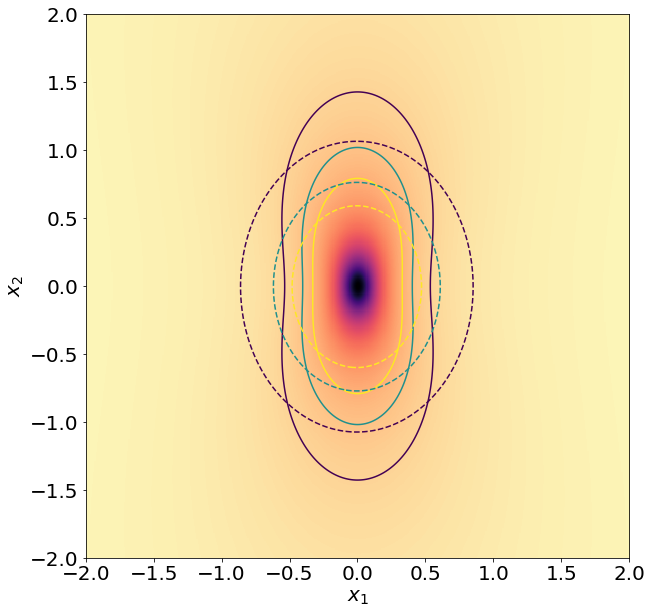

In [20]:
f=0.7
kwargs={'theta_c': 0.2, 'norm': 0.7, 'ell': (1.0-f)}
size=8.0
npix=1024
el=psie(size=size,npix=npix,**kwargs)
xmin=-size/2.0
ymin=xmin
xmax=-xmin
ymax=xmax

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.contour(el.convergence(),levels=[0.5,0.7,0.9],
           extent=[xmin,xmax,ymin,ymax])
ax.contour(df.convergence(),linestyles='dashed',levels=[0.5,0.7,0.9],
           extent=[xmin,xmax,ymin,ymax])
ax.imshow(el.convergence(),origin='low',
          extent=[xmin,xmax,ymin,ymax],cmap='magma_r')


ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',fontsize=20)

The figure shows some contour levels of the convergence map of a PNIE lens with $f=0.7$ (solid lines). The dashed lines show the  contours in the case of the NIE lens with the same $f$. Note that: 1) the ellipticities are not comparable: in the case of the PNIE lens $f$ is the axis ratio of elliptical iso-potential contours. The corresponding convergence is much more elongated; 2) the iso-convergence contours are not elliptical. The contours have dumbbell shapes.

# External perturbations

The following example shows how the addition of an external perturbation modifies the properties of a NIS model. The external shear is added by summing the potential

$$
\Psi_\gamma=\frac{1}{2}\gamma_1(x_1^2-x_2^2)+\gamma_2x_1x_2
$$

to the potential of the NIS.


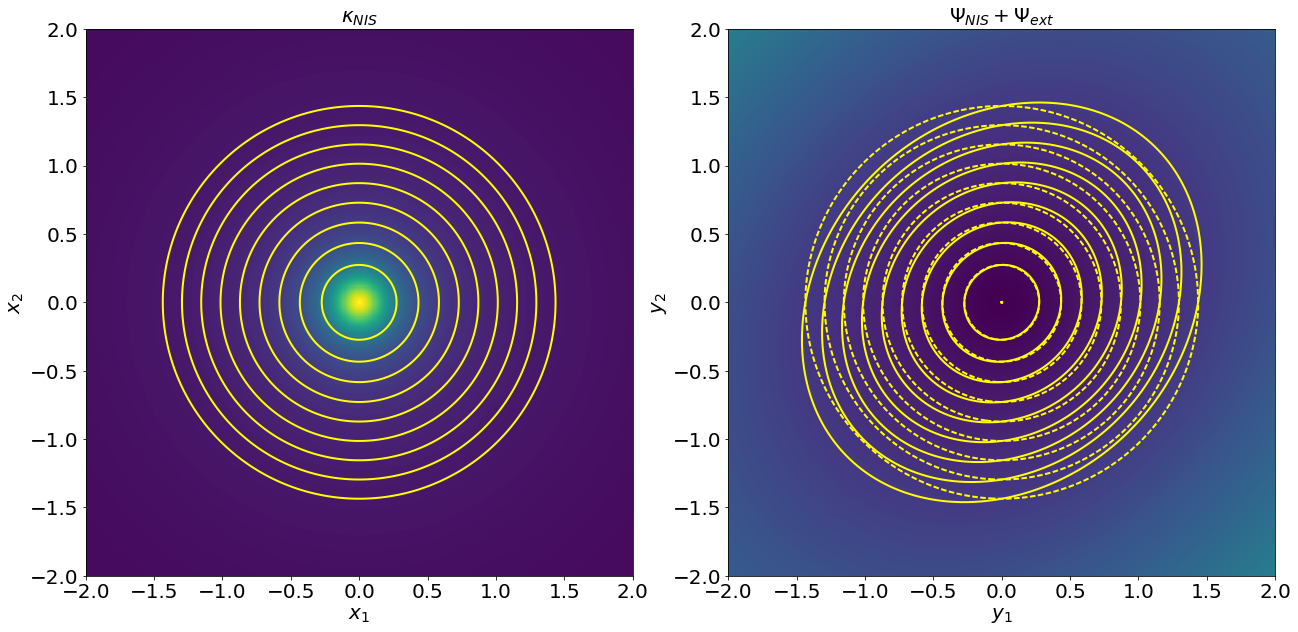

In [21]:
from mynewdeflector import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm
%matplotlib inline

size=8.0
npix=1024
xmin=-size/2.0
ymin=xmin
xmax=-xmin
ymax=xmax

def psi_extg(xk,yk,g1,g2):
    x1_,x2_=np.meshgrid(xk,yk) # lens plane mesh
    psi_g=g1/2.0*(x1_**2-x2_**2)+g2*x1_*x2_
    return(psi_g)

f=1.0 
xc=0.1
npix=1024
'''
the angle phi_g defines the direction of the shear
'''
phi_g=45.0
'''
g is the amplitude of the shear
'''
g=0.1
'''
g1, g2 are the two components of g
'''
g1=-g*np.cos(2.0*phi_g*np.pi/180.0)
g2=-g*np.sin(2.0*phi_g*np.pi/180.0)

xk=np.linspace(xmin,xmax,npix)
yk=np.linspace(ymin,ymax,npix)

kwargs={'theta_c': 0.2, 'norm': 0.8, 'ell': 0.0}
size=xmax-xmin
el=psie(size=size,npix=npix,**kwargs)

psi_ext=psi_extg(xk,yk,g1,g2)

'''
Let's compare to the potentia of a NIE model
'''
kwargs={'theta_c': 0.2, 'norm': 0.8, 'ell': 0.1}

fig,ax=plt.subplots(1,2,figsize=(18,10))
ax[0].imshow(el.convergence(),origin='low',extent=[xmin,xmax,ymin,ymax])
levels=np.linspace(np.min(el.pot),np.min(el.pot)+1,10)
cst=ax[0].contour(el.pot,levels=levels,colors='yellow',linewidths=2,extent=[xmin,xmax,ymin,ymax])
ax[1].imshow(el.pot+psi_ext,origin='low',extent=[xmin,xmax,ymin,ymax])

cst=ax[1].contour(el.pot+psi_ext,levels=levels,colors='yellow',linewidths=2,extent=[xmin,xmax,ymin,ymax])
cst=ax[1].contour(el.pot,linestyles='dashed',levels=levels,colors='yellow',linewidths=2,extent=[xmin,xmax,ymin,ymax])
ax[0].set_xlim([-2,2])
ax[0].set_ylim([-2,2])
ax[1].set_xlim([-2,2])
ax[1].set_ylim([-2,2])

for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')
    
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)    

ax[0].set_title(r'$\kappa_{NIS}$',fontsize=20)
ax[1].set_title(r'$\Psi_{NIS}+\Psi_{ext}$',fontsize=20)
plt.tight_layout()

Now, we visualize the critical lines and caustics:

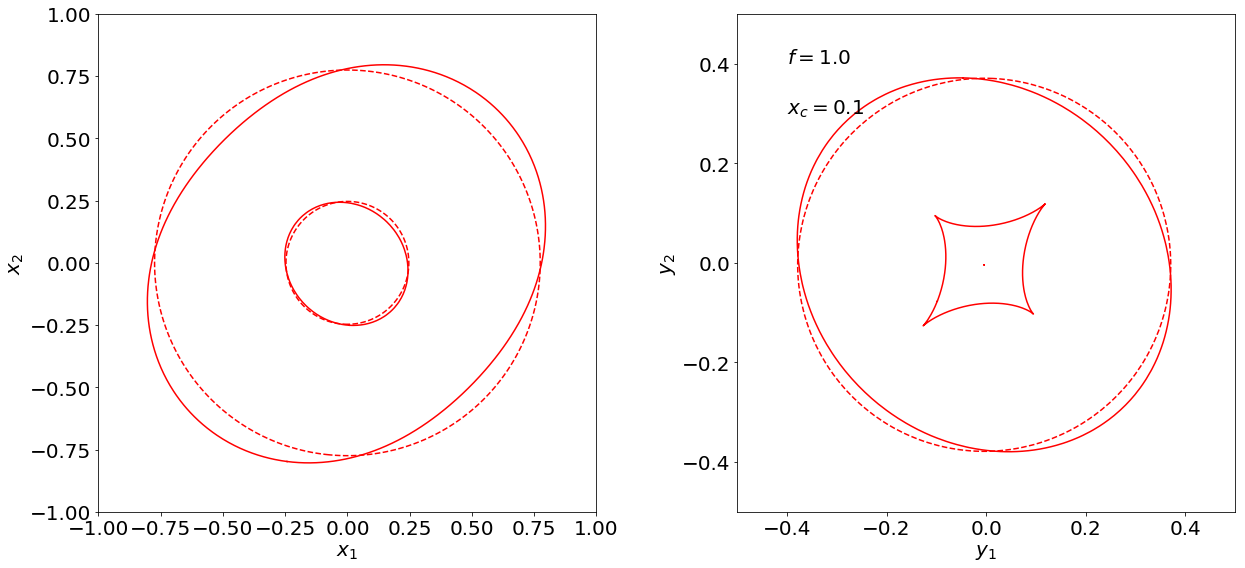

In [22]:
fig,ax=plt.subplots(1,2,figsize=(18,8))

# critical lines and caustics on the unperturbed NIS
el.clines(ax=ax[0])
el.caustics(lt='--',ax=ax[1])

# now combining the unperturbed potential and the external shear potential 
pixel=size/(npix-1)
pert_el=deflector_from_potential(el.pot+psi_ext,
                                 size=size,npix=npix)

# visualize the critical lines and caustics
pert_el.clines(ax=ax[0])
ax[0].contour(el.detA(),linestyles='dashed',levels=[0.0],
              extent=[xmin,xmax,ymin,ymax],
            colors='red')
pert_el.caustics(ax=ax[1])

        
ax[1].set_xlim([-0.5,0.5])
ax[1].set_ylim([-0.5,0.5])
ax[0].set_xlim([-1,1])
ax[0].set_ylim([-1,1])
                      
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

ax[1].text(-0.4,0.4,'$f=$'+str(f),fontsize=20)
ax[1].text(-0.4,0.3,'$x_c=$'+str(xc),fontsize=20)
plt.tight_layout()

We note that the addition of  an external shear to an axially symmetric lens causes the critical lines and caustics to become very similar to what we'd obtain with an elliptical lens.

# Substructures

The inclusion of substructure into an extended lens model consists of summing up the potential or the deflection fields of the substructures themselves with that of the main lens.

Here is an example. We generate a number of substructures to be randomly distributed on the top of a NIE model. These substructures are scaled-down versions of the lens within which they are distributed.

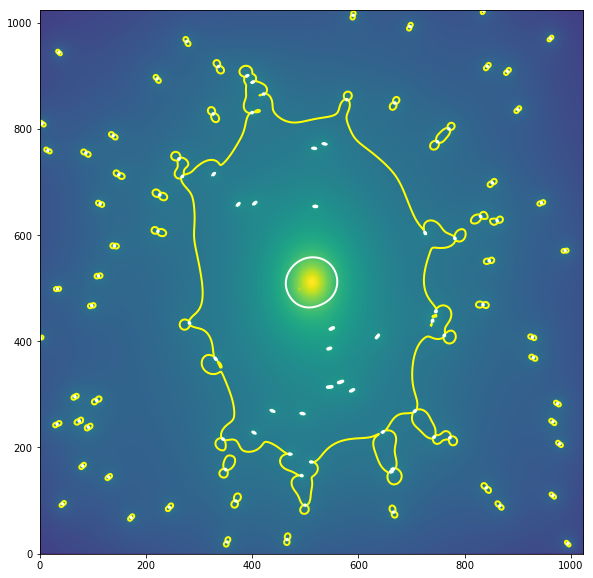

In [23]:
"""
Main lens:
"""
kwargs={'theta_c': 5.0, 'norm': 30.0, 'ell': 0.1}
size=200.0
npix=1024.0
main_lens=psie(size=size,npix=npix,**kwargs)

"""
substructures
"""
n_pert=100

xsub=(np.random.random_sample(n_pert)-0.5)*size
ysub=(np.random.random_sample(n_pert)-0.5)*size

fsub=np.random.random_sample(n_pert)
pa=np.random.random_sample(n_pert)*2.0*np.pi

pot=main_lens.pot
for i in range(n_pert):
    kwargs={'theta_c': 0.0, 'norm': 0.5, 'ell': 0.0, 'pa': pa[i]}
    sub_lens=psie(x0=xsub[i],y0=ysub[i],size=size,npix=npix,**kwargs)
    pot=pot+sub_lens.pot

df=deflector_from_potential(pot=pot,size=size,npix=npix)

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(df.convergence(),origin='low',norm=LogNorm())
g1,g2=df.shear()
lambdat=1.0-df.convergence()-np.sqrt(g1*g1+g2*g2)
lambdar=1.0-df.convergence()+np.sqrt(g1*g1+g2*g2)
cst=ax.contour(lambdat,levels=[0.0],colors='yellow',linewidths=2)
ax.imshow(lambdar,origin='low',alpha=0)
csr=ax.contour(lambdar,levels=[0.0],colors='white',linewidths=2)

# Multiple images

The following code allows to compute multiple images of sources placed at any position on the source plane. It allows also to assign to each source properties as size, brightness (Sersic) profile, and ellipticity and to visualize via ray-tracing the resulting distortions of the images.

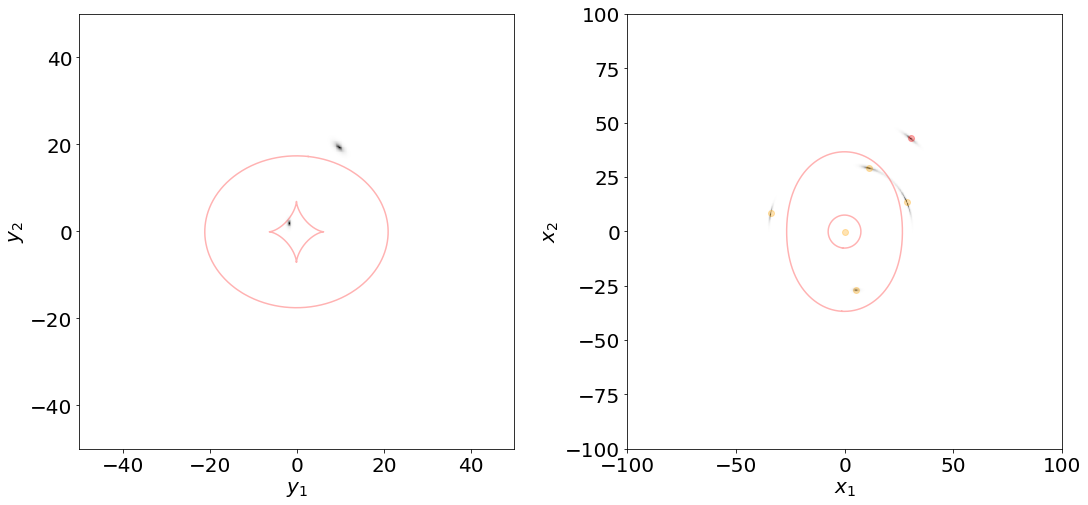

In [78]:
# create a PNIE lens (PSIE with core). The keyword 'norm' specify the size (mass) of the deflector
kwargs_lens_true={'theta_c': 5.0, 'norm': 30.0, 'ell': 0.1}
size=200.0  # size of the FOV
npix=1024.0 # n of pixels covering the FOV
df_true=psie(size=size,npix=npix,**kwargs_lens_true)

fig,ax=plt.subplots(1,2,figsize=(18,8))
# plot the critical lines and the caustics in separate panels
df_true.clines(ax=ax[1],alpha=0.3)
df_true.caustics(ax=ax[0],alpha=0.3)

ax[0].set_xlim([-size/4.,size/4.])
ax[0].set_ylim([-size/4.,size/4.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

    
# now define the unlensed source and the corresponding lensed version
kwargs_source={'q': 0.5,'re': 0.6, 'pa': np.pi, 'n': 1,'ys1': -1.7, 'ys2': 1.9}
#kwargs_source={'q': 0.5,'re': 0.6, 'pa': np.pi, 'n': 1,'ys1': -2.7, 'ys2': 3.9}
se_unlensed=sersic(size,npix,**kwargs_source)
se=sersic(size,npix,gl=df_true,**kwargs_source)

# find the location of the multiple images via grid searching
xi1,xi2=df_true.find_images(kwargs_source['ys1'],kwargs_source['ys2'])

# save images of the lensed source and of its images in separate arrays
image_lensed=se.image
image_unlensed=se_unlensed.image

# just for fun: perform the same operations with a second source
kwargs_source1={'q': 0.5,'re': 1.0, 'pa': np.pi/4, 'n': 1,'ys1': 9.8, 'ys2': 19.4}
se_unlensed=sersic(size,npix,**kwargs_source1)
se=sersic(size,npix,gl=df_true,**kwargs_source1)
xe1,xe2=df_true.find_images(kwargs_source1['ys1'],kwargs_source1['ys2'])
image_lensed=image_lensed+se.image
image_unlensed=image_unlensed+se_unlensed.image

# plot the results
ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 
ax[1].plot(xe1,xe2,'o',color='red',alpha=0.3)
ax[1].plot(xi1,xi2,'o',color='orange',alpha=0.3)
#y1,y2=df.map_back(xi1,xi2)

# How does parametric modeling work?

When we observe strong lensing features as those shown above, we can try to learn the underlying mass distribution of the lens by performing the so-called lens inversion.

For this kind of task, it has been shown that parametric modeling works reasonably well.

Typical parametric modeling tools perform the following operations:

1) Given some lens parameters, the multiple images belonging to the same family are mapped back onto the source plane.

2) For each image, a predicted source position is found. Ideally, if the chosen lens parameters are correct, the predicted source positions should coincide with the true source position.

3) Each predicted source is then re-mapped onto the image plane. Each observed image will correspond to a number of predicted image positions. Ideally, these predicted image positions will overlap with the observed image positions, if the chosen lens parameters are correct.

4) The goal parametric modeling is to search for the right set of lens parameters that minimize the distance between the observed and the predicted images.

5) A faster approach is to search the set of parameters that minimize the scatter of the predicted images on the source plane. 

Let see an example.

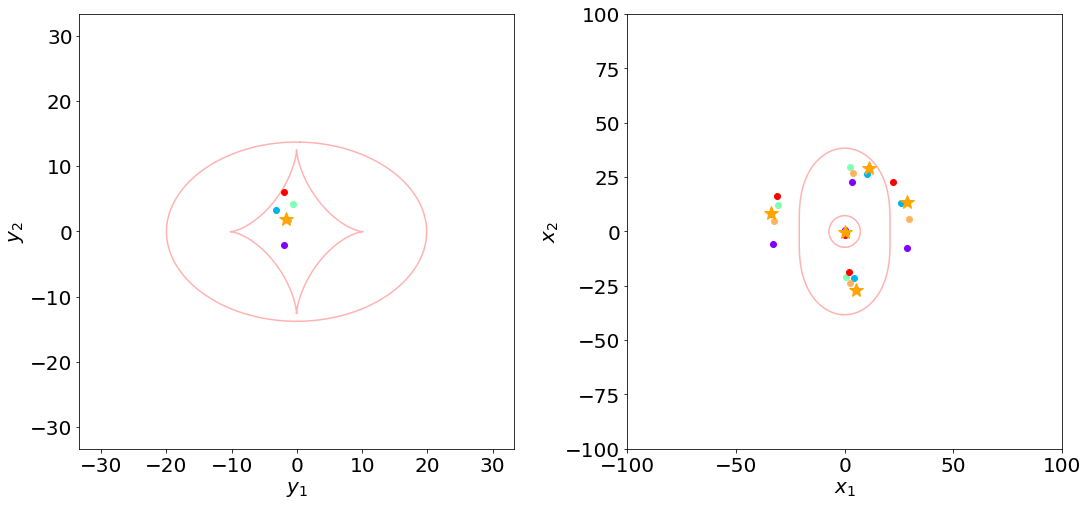

In [79]:
from matplotlib.pyplot import cm 

"""
Main lens:
"""
# pick some model parameters and build a deflector

kwargs_lens_guess={'theta_c': 5.3, 'norm': 26.0, 'ell': 0.18}
#kwargs_lens_guess={'theta_c': 5.0, 'norm': 30.0, 'ell': 0.1}
size=200.0
npix=2048.0
df_guess=psie(size=size,npix=npix,**kwargs_lens_guess)

fig,ax=plt.subplots(1,2,figsize=(18,8))
df_guess.clines(ax=ax[1],alpha=0.3)
df_guess.caustics(ax=ax[0],alpha=0.3)

# the true position of the source
#kwargs={'ys1': -1.7, 'ys2': 1.9}

        
ax[0].set_xlim([-size/6.,size/6.])
ax[0].set_ylim([-size/6.,size/6.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

# delens the images, mapping them back to the source plane using the chosen
# lens parameters. We obtain a number of source positions (one for each image used)
y1,y2=df_guess.map_back(xi1,xi2)

# for each source point, we find the images given the lens model
color=iter(cm.rainbow(np.linspace(0,1,y1.size)))
xp1=[]
xp2=[]
for i in range(len(y1)):
    c=next(color)
    xe1,xe2=df_guess.find_images(y1[i],y2[i])
    xp1.append(xe1)
    xp2.append(xe2)
    ax[1].plot(xe1,xe2,'o',color=c)
    ax[0].plot(y1[i],y2[i],'o',color=c)

ax[1].plot(xi1,xi2,'*',color='orange',markersize=15)
ax[0].plot(kwargs_source['ys1'],kwargs_source['ys2'],'*',color='orange',markersize=15)

In the figures above, we see that

* each image (stars in the right panel) is mapped onto a source (colored circles in the left panel)
* since the chosen lens parameters are not the true ones, the sources obtained in this way do not coincide with the true source (star in the left panel)
* if we compute the images of each of the colored sources, we end up with sets of multiple images on the image plane (colored circles in the right panel)
* each observed image has a number of corresponding predicted images.

The goal is to find the model parameters that minimize the difference between the predicted and the observed image positions. Therefore, one can define a penalty function, for example by computing the distance between the closest predicted image and the given observed image. Repeating this operation for each image and summing the distances in quadrature, we obtain a $\chi^2$ function, which has to be minimized to give the best-fit lens model.

For example:

In [80]:
chi2=0.0
sigma=0.5
for i in range(len(xi1)):
    for j in range(len(xi1)):
        dist=(xp1[i]-xi1[j])**2+(xp2[i]-xi2[j])**2
        inde=np.argsort(dist)
        chi2=chi2+dist[inde[0]]/sigma**2
    
print (chi2)

5495.02451503


Let now re-write the above code in a more convenient way:

In [81]:
# given a deflector df, returns the predicted images (xp1,xp2) for each 
# observed image (xi1,xi2)

def get_Images_from_parameters(xi1,xi2,df):
    y1,y2=df.map_back(xi1,xi2)
    xp1=[]
    xp2=[]
    for i in range(len(y1)):
        xe1,xe2=df.find_images(y1[i],y2[i])
        xp1.append(xe1)
        xp2.append(xe2)
    return(xp1,xp2)

# given a set of observed and predicted images, returns a chi2 
def chi2(xi1,xi2,xp1,xp2):
    chi2=0.0
    sigma=0.5
    for i in range(len(xi1)):
        for j in range(len(xi1)):
            dist=(xp1[i]-xi1[j])**2+(xp2[i]-xi2[j])**2
            inde=np.argsort(dist)
            chi2=chi2+dist[inde[0]]/sigma**2
    return(chi2)



Now, we can vary some of the parameters and compute the corresponding $\chi^2$. For example, we can compute the $\chi^2$ for several values of the core radius:

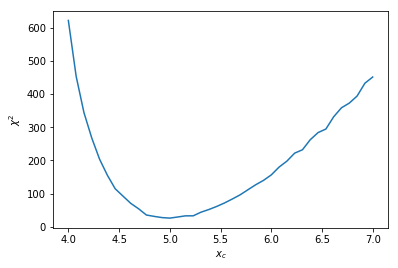

In [82]:
theta_c=np.linspace(4.0,7.0,40)

c2=[]
for i in range(len(theta_c)):
    kwargs={'theta_c': theta_c[i], 'norm': 30.0, 'ell': 0.1}
    df1=psie(size=200,npix=512,**kwargs)
    xp1,xp2=get_Images_from_parameters(xi1,xi2,df1)
    c2.append(chi2(xi1,xi2,xp1,xp2))
    
plt.plot(theta_c,c2)
plt.xlabel('$x_c$')
plt.ylabel('$\chi^2$')

One other possibility is to compute the average source position in the source plane, and map the average source onto the lens plane:

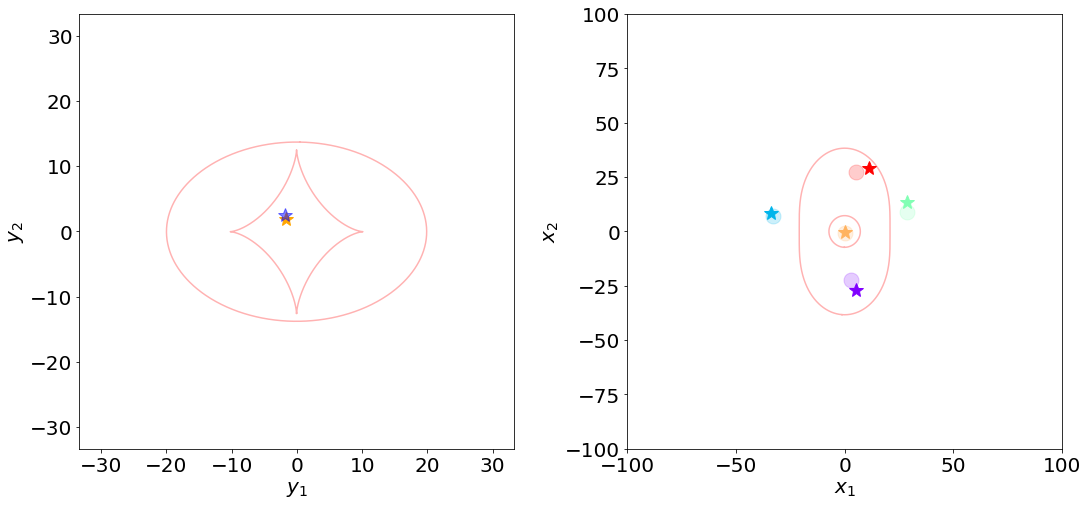

In [84]:
def associate_images(xi1,xi2,xe1,xe2):
    associated=np.zeros(len(xi1))
    for i in range(len(xi1)):
        dist=(xe1-xi1[i])**2+(xe2-xi2[i])**2
        inde=np.argsort(dist)
        associated[i]=np.int(inde[0])
    return(associated)

# our guessed model
kwargs_lens_guess={'theta_c': 5.3, 'norm': 26.0, 'ell': 0.18}
#kwargs={'theta_c': 5.0, 'norm': 30.0, 'ell': 0.1}
size=200.0
npix=2048.0
df_guess=psie(size=size,npix=npix,**kwargs_lens_guess)

y1_mean,y2_mean=y1.mean(),y2.mean()
xe1,xe2=df_guess.find_images(y1_mean,y2_mean)
associated=associate_images(xi1,xi2,xe1,xe2).astype(int)
fig,ax=plt.subplots(1,2,figsize=(18,8))
df_guess.clines(ax=ax[1],alpha=0.3)
df_guess.caustics(ax=ax[0],alpha=0.3)

        
ax[0].set_xlim([-size/6.,size/6.])
ax[0].set_ylim([-size/6.,size/6.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')
    
color=iter(cm.rainbow(np.linspace(0,1,y1.size)))
for i in range(len(xi1)):
    c=next(color)
    ax[1].plot(xi1[i],xi2[i],'*',color=c,markersize=15)
    ax[1].plot(xe1[associated[i]],xe2[associated[i]],'o',color=c,markersize=15,alpha=0.2)
ax[0].plot(kwargs_source['ys1'],kwargs_source['ys2'],'*',color='orange',markersize=15)
ax[0].plot(y1_mean,y2_mean,'*',color='blue',markersize=15,alpha=0.5)



In [85]:
chi2=0.0
sigma=0.1
associated=np.zeros(len(xi1))
for i in range(len(xi1)):
    dist=(xe1-xi1[i])**2+(xe2-xi2[i])**2
    inde=np.argsort(dist)
    associated[i]=np.int(inde[0])
    chi2=chi2+dist[inde[0]]/sigma
    
print (chi2)

827.036302118


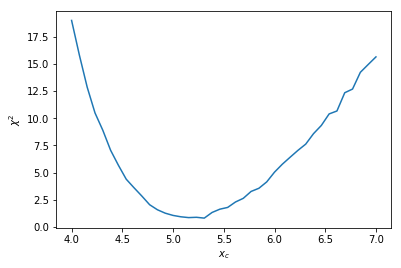

In [86]:
def get_Images_from_parameters_mean(xi1,xi2,df1):
    y1,y2=df1.map_back(xi1,xi2)
    y1_mean,y2_mean=y1.mean(),y2.mean()
    xp1,xp2=df1.find_images(y1_mean,y2_mean)
    return(xp1,xp2)

def chi2_mean(xi1,xi2,xp1,xp2):
    sigma=0.5
    chi2=(xp1-xi1)**2+(xp2-xi2)**2
    chi2=chi2/sigma**2
    return(chi2.sum())

theta_c=np.linspace(4.0,7.0,40)
#theta_c=[5.0]

c2=[]
for i in range(len(theta_c)):
    kwargs_this={'theta_c': theta_c[i], 'norm': 30.0, 'ell': 0.1}
    df1=psie(size=200,npix=2048,**kwargs_this)
    xp1,xp2=get_Images_from_parameters_mean(xi1,xi2,df1)
    associated=associate_images(xi1,xi2,xp1,xp2).astype(int)
    c2.append(chi2_mean(xi1,xi2,xp1[associated],xp2[associated]))


plt.plot(theta_c,c2)
plt.xlabel('$x_c$')
plt.ylabel('$\chi^2$')

### Other observables
Once the lens model has been defined, it is possible to use it to derive several lens properties. For example, the lens magnification map:



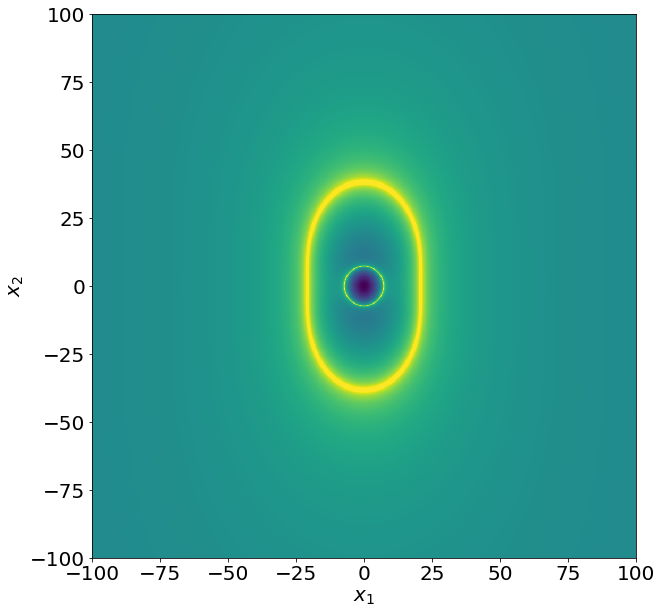

In [89]:
kwargs_lens_guess={'theta_c': 5.3, 'norm': 26.0, 'ell': 0.18}
size=200.0
npix=1024.0
df_guess=psie(size=size,npix=npix,**kwargs_lens_guess)
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(1.0/np.abs(df_guess.detA()),norm=LogNorm(),extent=[-size/2.,size/2.,-size/2.,size/2.],vmax=50)
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In particular, we can compute the predicted magnifications at the image locations. We cannot measure the absolute magnification of observed imaged, because we don't know the flux or the size of unlensed source. However, we can compute the relative magnification between the images (magnification ratios, which are equivalent to flux ratios or size ratios):

predicted flux ratios: [ 1.         -0.89804908 -1.26785605 -0.01403103  2.91711612]
observed flux ratios: [ 1.         -1.363088   -2.7590007  -0.00962072  2.54699251]


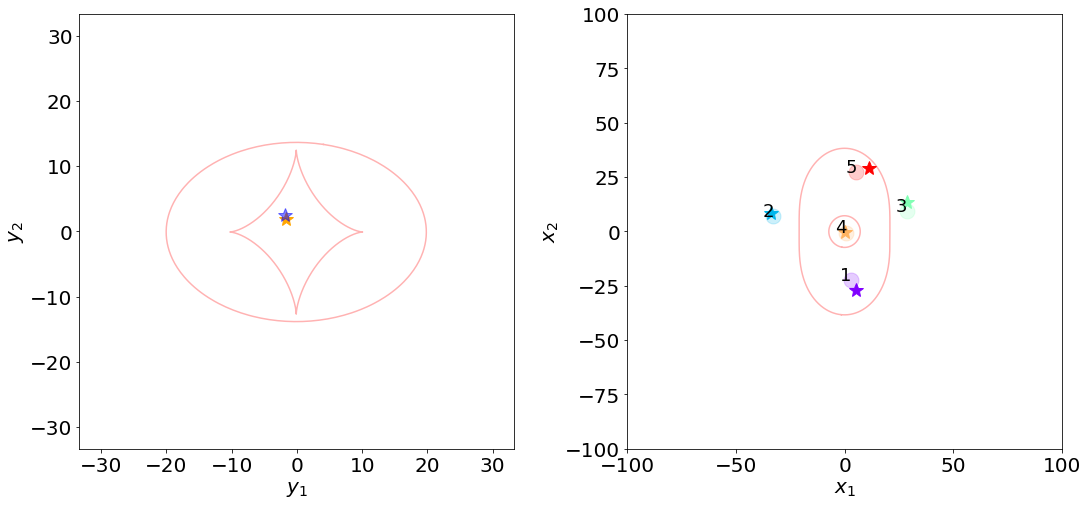

In [90]:
# magnification
mu_predicted=df_guess.imageMagnification(xi1,xi2)
mu_observed=df_true.imageMagnification(xi1,xi2)
print ('predicted flux ratios:',mu_predicted[0]/mu_predicted)
print ('observed flux ratios:',mu_observed[0]/mu_observed)

fig,ax=plt.subplots(1,2,figsize=(18,8))
df_guess.clines(ax=ax[1],alpha=0.3)
df_guess.caustics(ax=ax[0],alpha=0.3)

y1_mean,y2_mean=y1.mean(),y2.mean()
xe1,xe2=df_guess.find_images(y1_mean,y2_mean)
associated=associate_images(xi1,xi2,xe1,xe2).astype(int)
        
ax[0].set_xlim([-size/6.,size/6.])
ax[0].set_ylim([-size/6.,size/6.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')
    
color=iter(cm.rainbow(np.linspace(0,1,y1.size)))
for i in range(len(xi1)):
    c=next(color)
    ax[1].plot(xi1[i],xi2[i],'*',color=c,markersize=15)
    ax[1].plot(xe1[associated[i]],xe2[associated[i]],'o',color=c,markersize=15,alpha=0.2)
    ax[1].text(xe1[associated[i]]-5.0,xe2[associated[i]],str(i+1),fontsize=18)
ax[0].plot(kwargs_source['ys1'],kwargs_source['ys2'],'*',color='orange',markersize=15)
ax[0].plot(y1_mean,y2_mean,'*',color='blue',markersize=15,alpha=0.5)

A similar analysis can be done for the time-delays. The following shows the reconstructed time-delay surface of the lens:

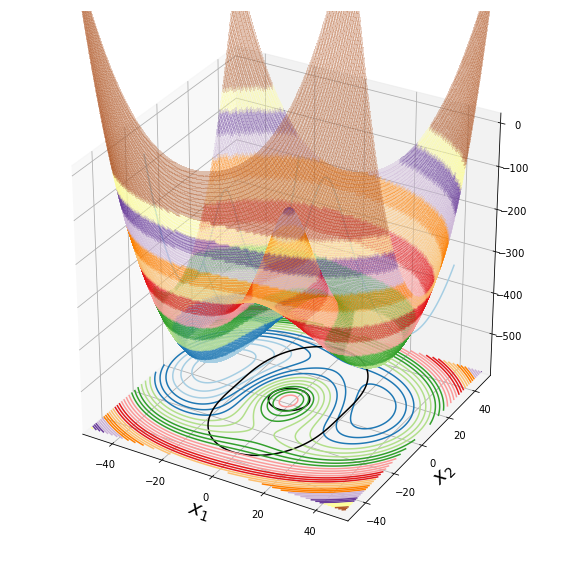

In [98]:
from mpl_toolkits.mplot3d import Axes3D
import pylab
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

size=100.0
npix=256
df_guess=psie(size=size,npix=npix,**kwargs_lens_guess)

y1,y2=df_guess.map_back(xi1,xi2)
y1_mean,y2_mean=y1.mean(),y2.mean()
td=df_guess.t_delay_surf(beta=[y1_mean,y2_mean])

fig = plt.figure(figsize=(10,10))
ax3d = fig.add_subplot(111, projection='3d')
df_guess.show_surface(td,ax=ax3d)
ax3d.set_xlim([-size/2.,size/2.])
ax3d.set_ylim([-size/2.,size/2.])
ax3d.set_xlabel('$x_1$')
ax3d.set_ylabel('$x_2$')

Finally, we can compute the predicted time delays between the images. As for the magnification, we cannot measure absolute time delays, but we can measure relative time delays. For example, we could use the image with the minimal time delay as the reference image: 

In [99]:
size=100.0
npix=1024
df_guess=psie(size=size,npix=npix,**kwargs_lens_guess)
td_predicted=df_guess.imageTimeDelay(xe1[associated.astype(int)],xe2[associated.astype(int)],y1.mean(),y2.mean())
td_observed=df_true.imageTimeDelay(xi1,xi2,kwargs_source['ys1'],kwargs_source['ys2'])
print ('predicted time-delays:',td_predicted-td_predicted.min())
print ('observed time-delays:',td_observed-td_observed.min())

predicted time-delays: [ 293.37008028    0.          110.12261658  442.92161905  161.64929827]
observed time-delays: [ 227.09244998    0.          100.98662551  479.21805901  113.30749427]
